Anggota:
1. Iran Aziz Al-Rasyid (21/474378/PA/20481)
2. Krisna Bayu Dharma Putra (21/482071/PA/21017)
3. Rahmania (21/477740/PA/20698)


# **IMPORT LIBRARY**

In [1]:
pip install pycaret

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import(
    train_test_split,# used to split the data into training and testing
    RandomizedSearchCV,# used for tuning the models parameters
    cross_val_score,
)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVR
from sklearn.model_selection import(
    train_test_split,# used to split the data into training and testing
    RandomizedSearchCV,# used for tuning the models parameters
    cross_val_score,
)
from scipy.stats import(
    uniform,
    randint,
    )
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)
# for printing a table
from prettytable import(
 PrettyTable,
 ALL,
 FRAME,
    )
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import plotly.io as pio
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_log_error
import warnings
warnings.filterwarnings("ignore")

# **IMPORT DATASET**

In [ ]:
pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
# Import Dataset
train=pd.read_csv("/content/drive/MyDrive/SEM 6/Penambangan Data/mid_sem_project/train.csv")
test=pd.read_csv("/content/drive/MyDrive/SEM 6/Penambangan Data/mid_sem_project/test.csv")

In [67]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
train

Id  MSSubClass MSZoning  LotFrontage  LotArea  ... MoSold YrSold  \
0        1          60       RL         65.0     8450  ...      2   2008   
1        2          20       RL         80.0     9600  ...      5   2007   
2        3          60       RL         68.0    11250  ...      9   2008   
3        4          70       RL         60.0     9550  ...      2   2006   
4        5          60       RL         84.0    14260  ...     12   2008   
...    ...         ...      ...          ...      ...  ...    ...    ...   
1455  1456          60       RL         62.0     7917  ...      8   2007   
1456  1457          20       RL         85.0    13175  ...      2   2010   
1457  1458          70       RL         66.0     9042  ...      5   2010   
1458  1459          20       RL         68.0     9717  ...      4   2010   
1459  1460          20       RL         75.0     9937  ...      6   2008   

     SaleType SaleCondition SalePrice  
0          WD        Normal    208500  
1          WD        Normal    181500  
2          WD        Normal    223500  
3          WD       Abnorml    140000  
4          WD        Normal    250000  
...       ...           ...       ...  
1455       WD        Normal    175000  
1456       WD        Normal    210000  
1457       WD        Normal    266500  
1458       WD        Normal    142125  
1459       WD        Normal    147500  

[1460 rows x 81 columns]

In [69]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea  ... MiscVal MoSold  \
0     1461          20       RH         80.0    11622  ...       0      6   
1     1462          20       RL         81.0    14267  ...   12500      6   
2     1463          60       RL         74.0    13830  ...       0      3   
3     1464          60       RL         78.0     9978  ...       0      6   
4     1465         120       RL         43.0     5005  ...       0      1   
...    ...         ...      ...          ...      ...  ...     ...    ...   
1454  2915         160       RM         21.0     1936  ...       0      6   
1455  2916         160       RM         21.0     1894  ...       0      4   
1456  2917          20       RL        160.0    20000  ...       0      9   
1457  2918          85       RL         62.0    10441  ...     700      7   
1458  2919          60       RL         74.0     9627  ...       0     11   

     YrSold SaleType SaleCondition  
0      2010       WD        Normal  
1      2010       WD        Normal  
2      2010       WD        Normal  
3      2010       WD        Normal  
4      2010       WD        Normal  
...     ...      ...           ...  
1454   2006       WD        Normal  
1455   2006       WD       Abnorml  
1456   2006       WD       Abnorml  
1457   2006       WD        Normal  
1458   2006       WD        Normal  

[1459 rows x 80 columns]

# **EDA**

In [70]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [71]:
def evaluate_null(data) :
  z=pd.DataFrame()
  z['columns']=data.columns
  z['null_value']=data.isnull().sum().values
  z['type']=data.dtypes.values
  z['nunique']=data.nunique().values
  z["%null_value"]=z['null_value']/len(data)
  return z.sort_values(by='null_value',ascending=False)

In [72]:
null_test=evaluate_null(test).sort_values(by='null_value',ascending=False)

In [73]:
null_train=evaluate_null(train).sort_values(by='null_value',ascending=False)

In [74]:
null_train

columns  null_value    type  nunique  %null_value
72        PoolQC        1453  object        3     0.995205
74   MiscFeature        1406  object        4     0.963014
6          Alley        1369  object        2     0.937671
73         Fence        1179  object        4     0.807534
57   FireplaceQu         690  object        5     0.472603
..           ...         ...     ...      ...          ...
47  BsmtFullBath           0   int64        4     0.000000
40     HeatingQC           0  object        5     0.000000
45  LowQualFinSF           0   int64       24     0.000000
11     LandSlope           0  object        3     0.000000
80     SalePrice           0   int64      663     0.000000

[81 rows x 5 columns]

In [75]:
null_test

columns  null_value    type  nunique  %null_value
72         PoolQC        1456  object        2     0.997944
74    MiscFeature        1408  object        3     0.965045
6           Alley        1352  object        2     0.926662
73          Fence        1169  object        4     0.801234
57    FireplaceQu         730  object        5     0.500343
..            ...         ...     ...      ...          ...
49       FullBath           0   int64        5     0.000000
46      GrLivArea           0   int64      879     0.000000
4         LotArea           0   int64     1106     0.000000
5          Street           0  object        2     0.000000
79  SaleCondition           0  object        6     0.000000

[80 rows x 5 columns]

## **Missing Value**

Missing Value is not defined in the paper, so we decide to impute it with mean, most frequency, and also drop it. we drop the missing value that is so many


In [76]:
# Plot missing Value Train
# Calculate percentage of missing values
null_train['percent_missing'] = null_train['%null_value']*100

# Create the bar chart with color based on percent missing values
fig = px.bar(data_frame=null_train[null_train['null_value']>0], y='percent_missing', x='columns', color='percent_missing', color_continuous_scale='Reds')

# Update axis labels
fig.update_xaxes(title_text='train_columns')
fig.update_yaxes(title_text='Percentage of train Missing Values')
fig.update_layout(coloraxis_colorbar=dict(title='scale of % Missing Values'))




In [77]:
# Plot missing Value Test
null_test['percent_null'] = null_test['%null_value']*100

fig = px.bar(data_frame=null_test[null_test['null_value']>0], y='percent_null', x='columns', color='percent_null',color_continuous_scale='blugrn')

fig.update_xaxes(title_text='test_columns')
fig.update_yaxes(title_text='Percentage of test Missing Values')
fig.update_layout(coloraxis_colorbar=dict(title='scale of % Missing Values'))



## **Numerical Feature HeatMap Correlation (TOP 10)**

In [78]:
corr=train.corr()['SalePrice']


In [79]:
corr

Id            -0.021917
MSSubClass    -0.084284
LotFrontage    0.351799
LotArea        0.263843
OverallQual    0.790982
                 ...   
PoolArea       0.092404
MiscVal       -0.021190
MoSold         0.046432
YrSold        -0.028923
SalePrice      1.000000
Name: SalePrice, Length: 38, dtype: float64

In [80]:
sorted_corr=abs(corr).sort_values(axis=0,ascending=False)

In [81]:
sorted_index=sorted_corr.head(10).index

In [82]:
sorted_train=train[sorted_index]


In [83]:
corr=sorted_train.corr()

In [84]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# # Create a custom divergin palette
# cmap = sns.diverging_palette(100, 7, s=75, l=40,
#                             n=5, center="light", as_cmap=True)

Text(0.5, 1.0, 'Correlation of train data')

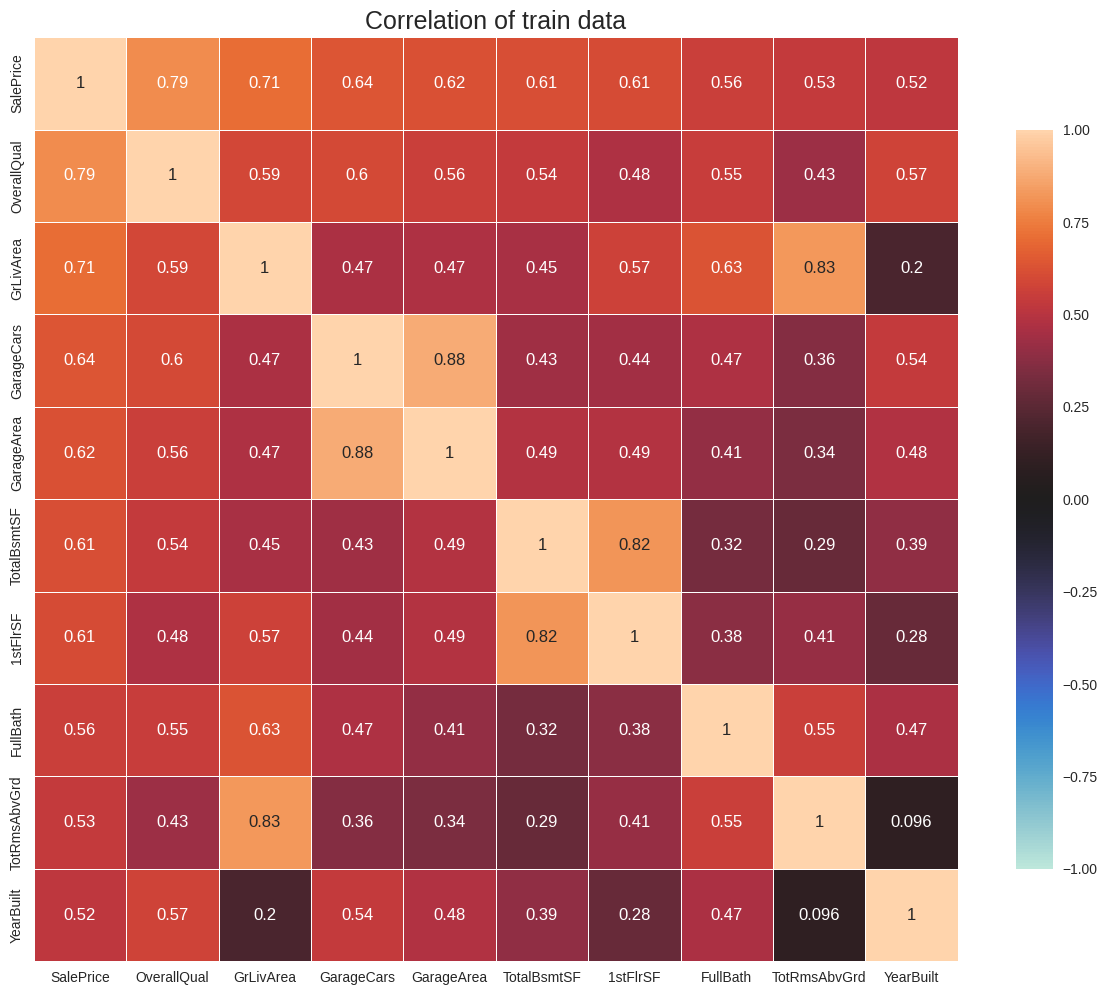

In [85]:
#Plot heatmap of the train
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation of train data', fontsize=18)



##  **mean count Max**

In [86]:
# See the max and mean of the dataset
pd.set_option('display.float_format', lambda x: '%.2f' % x)
train.iloc[:, :-1].describe().T.sort_values(by='std', ascending=False)\
                     .style.background_gradient(cmap='cool')\
                     .bar(subset=["mean",], color='red')\
                     .bar(subset=["max"], color='#BB0000')

In [87]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
test.iloc[:, :-1].describe().T.sort_values(by='std', ascending=False)\
                     .style.background_gradient(cmap='cool')\
                     .bar(subset=["mean",], color='red')\
                     .bar(subset=["max"], color='#BB0000')

## **Categorical Feature vs SalePrice**

### **Boxplot**

In [88]:
# Separate categorical and continuous feature
categorical_variables=train.select_dtypes(include='object').columns
continuous_variables=train.select_dtypes(exclude='object').columns



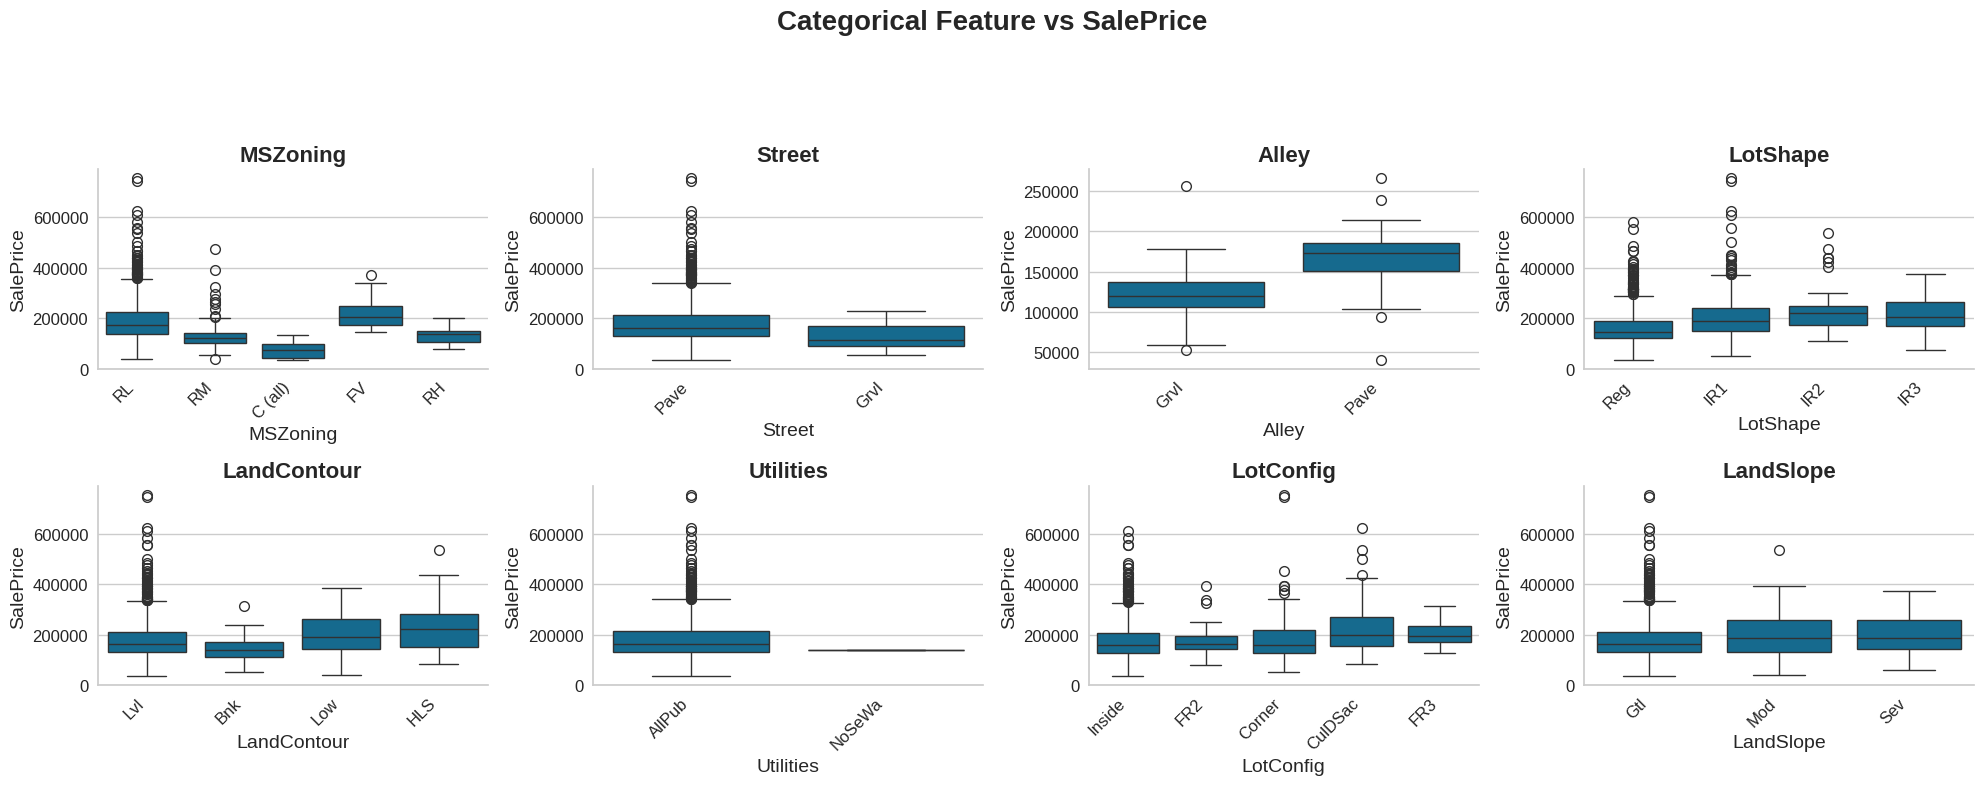

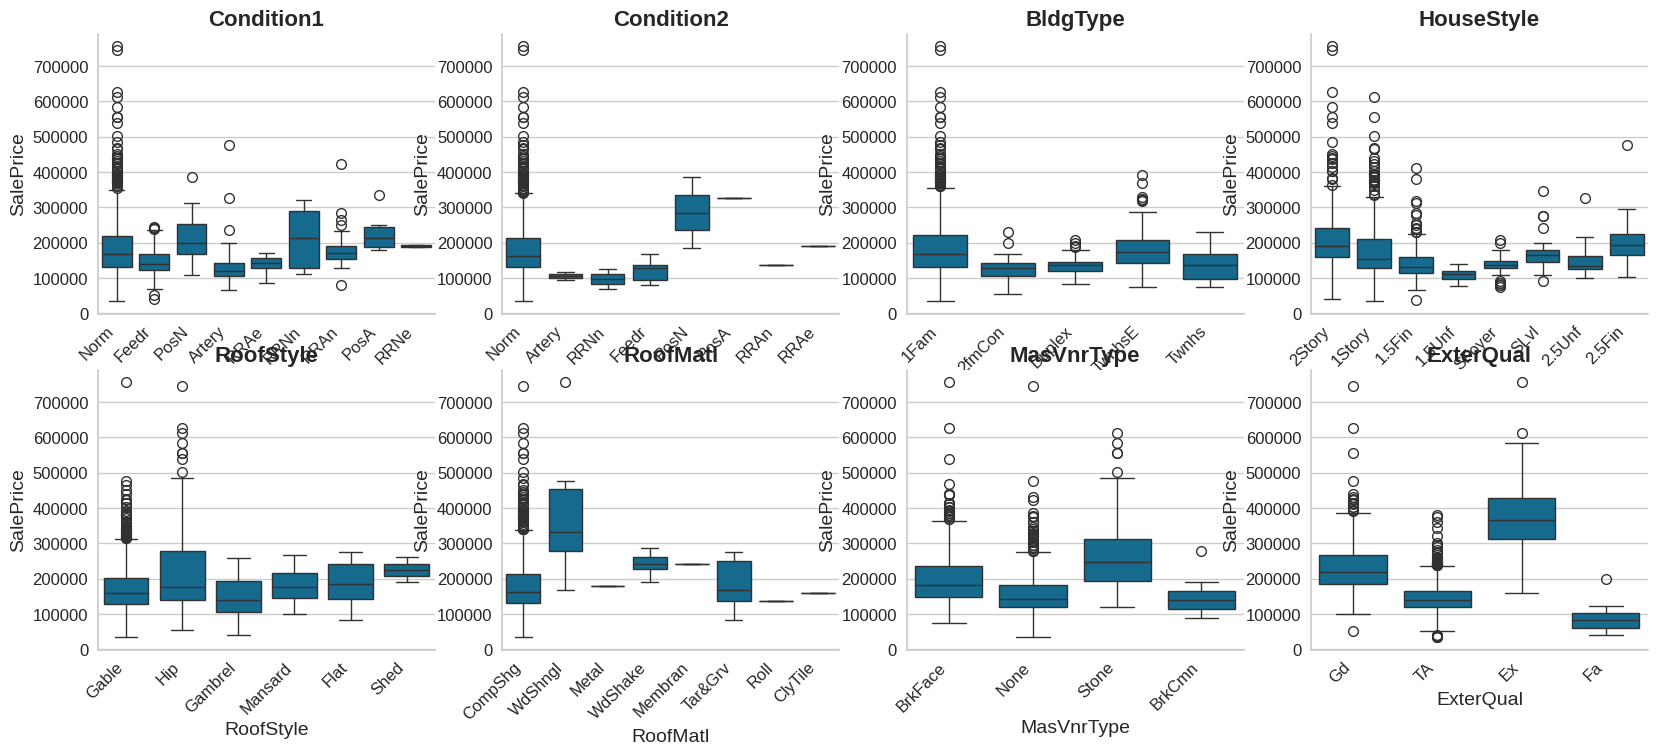

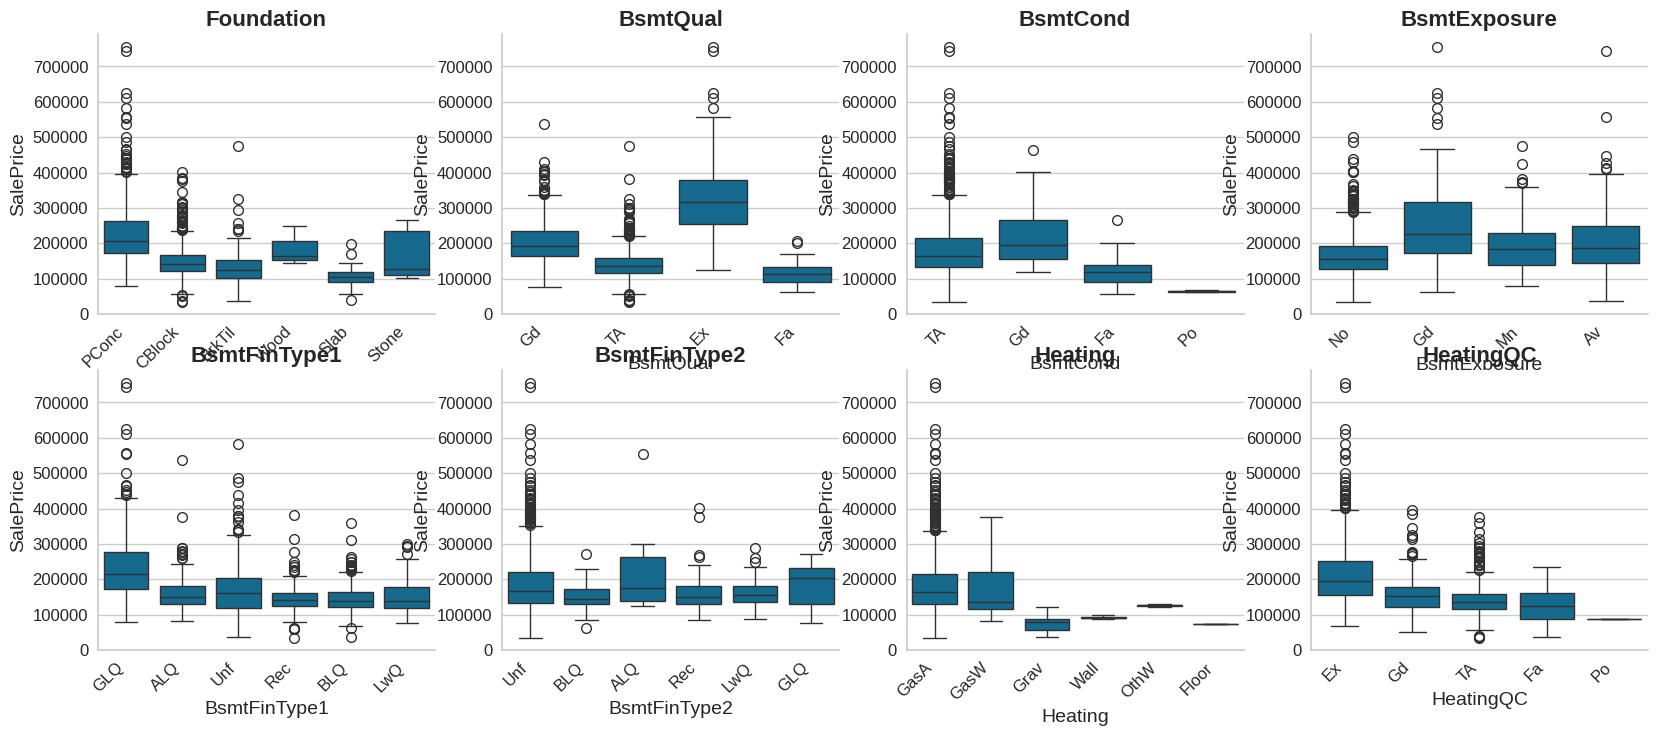

In [89]:
# nrows=(len(col_subplots) + ncols - 1) // ncols
# Plotting the categorical feature

cat_features = [col for col in categorical_variables if train[col].nunique() < 10]

if len(cat_features) > 7:
    nrows1 = 2
    ncols1 = 4
    nrows2 = (len(cat_features) - 8 + 1) // 3
    ncols2 = 3
else:
    nrows1 = 2
    ncols1 = 3
    nrows2 = 0
    ncols2 = 0

fig, axes = plt.subplots(ncols=ncols1, nrows=nrows1, figsize=(20, 8))
axes_it = axes.flat

# Iterate over the categorical variables and plot them on the first plot
for col, ax in zip(cat_features[:8], axes_it):
    sns.boxplot(data=train, x=col, y=train['SalePrice'], ax=ax)
    ax.set_xlabel(f"{col}", fontsize=14)
    ax.set_ylabel('SalePrice', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f'{col}', fontweight='bold', fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add the suptitle and adjust the layout
fig.suptitle(f'Categorical Feature vs Target\n\n\n', ha='center', fontweight='bold', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

fig.suptitle(f'Categorical Feature vs SalePrice\n\n\n', ha='center',  fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

if len(cat_features) > 7:
    fig, axes = plt.subplots(ncols=ncols1, nrows=nrows1, figsize=(20, 8))
    axes_it = axes.flat

    # Iterate over the remaining categorical variables and plot them on the second plot
    for col, ax in zip(cat_features[8:17], axes_it):
        sns.boxplot(data=train, x=col, y=train['SalePrice'], ax=ax)
        ax.set_xlabel(f"{col}", fontsize=14)
        ax.set_ylabel('SalePrice', fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(f'{col}', fontweight='bold', fontsize=16)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Adjust the layout and save the second plot as a PNG file

    # Show the second plot
    plt.show()

if len(cat_features) > 7:
    fig, axes = plt.subplots(ncols=ncols1, nrows=nrows1, figsize=(20, 8))
    axes_it = axes.flat

    # Iterate over the remaining categorical variables and plot them on the second plot
    for col, ax in zip(cat_features[17:], axes_it):
        sns.boxplot(data=train, x=col, y=train['SalePrice'], ax=ax)
        ax.set_xlabel(f"{col}", fontsize=14)
        ax.set_ylabel('SalePrice', fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(f'{col}', fontweight='bold', fontsize=16)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Adjust the layout and save the second plot as a PNG file



In [90]:

# Visualize it on plotly
def vis_cat(data,what) :
  fig = make_subplots(rows=len(what)//3+1, cols=3,subplot_titles=what+" Vs SalePrice")
  a=1
  id=0
  for num,col in enumerate(what):
    if (id+1)%3==0 :
      nums=3
    else :
      nums=(id+1)%3
    if data[col].nunique() < 10 :
      fig.add_trace(go.Box(x=data[col],y=data['SalePrice'],name=col),row=a,col=nums)
      if (id+1)%3==0 :
        a+=1
      id+=1
  fig.update_layout(width=1500,height=2000)
  return fig.show()




In [91]:
# only visualize that have nuniwue <10
cat10 = train[categorical_variables].loc[:, train[categorical_variables].nunique() <10]
cat10=cat10.columns

In [92]:
vis_cat(train,cat10)

### **Countplot**

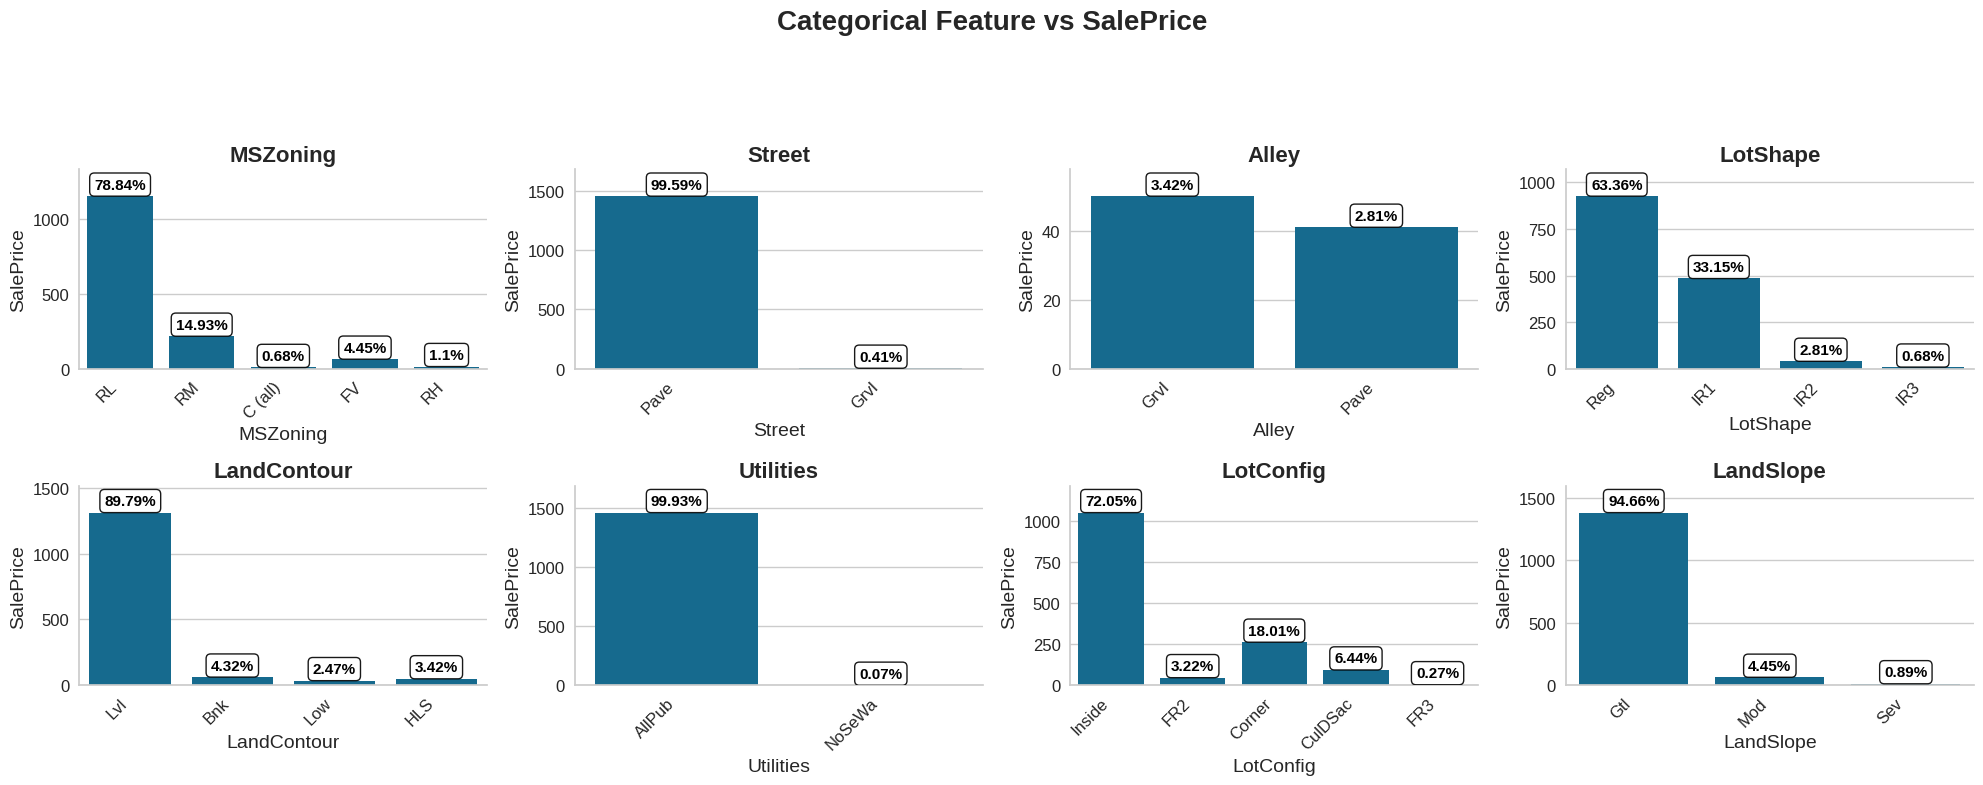

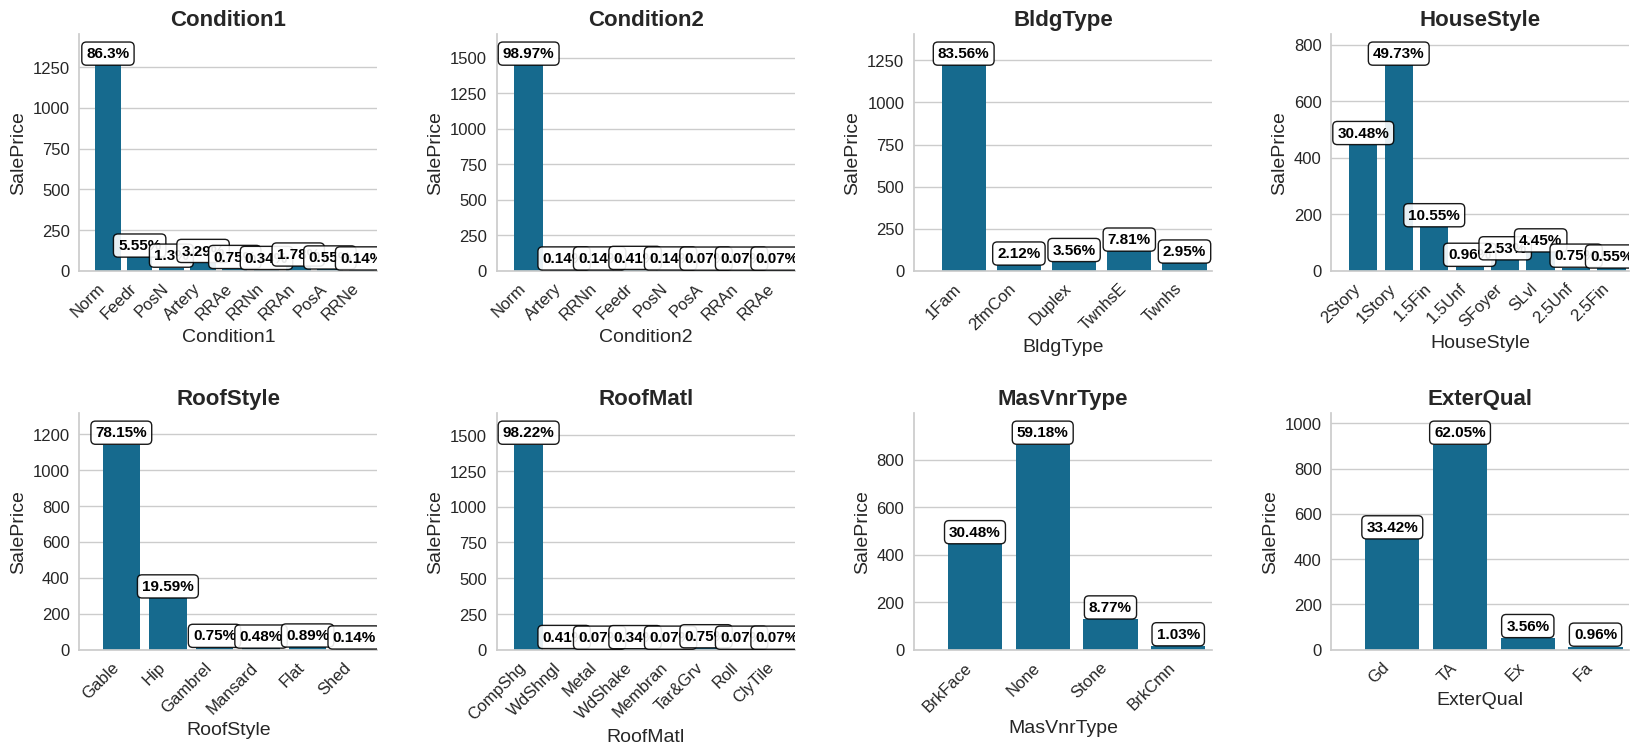

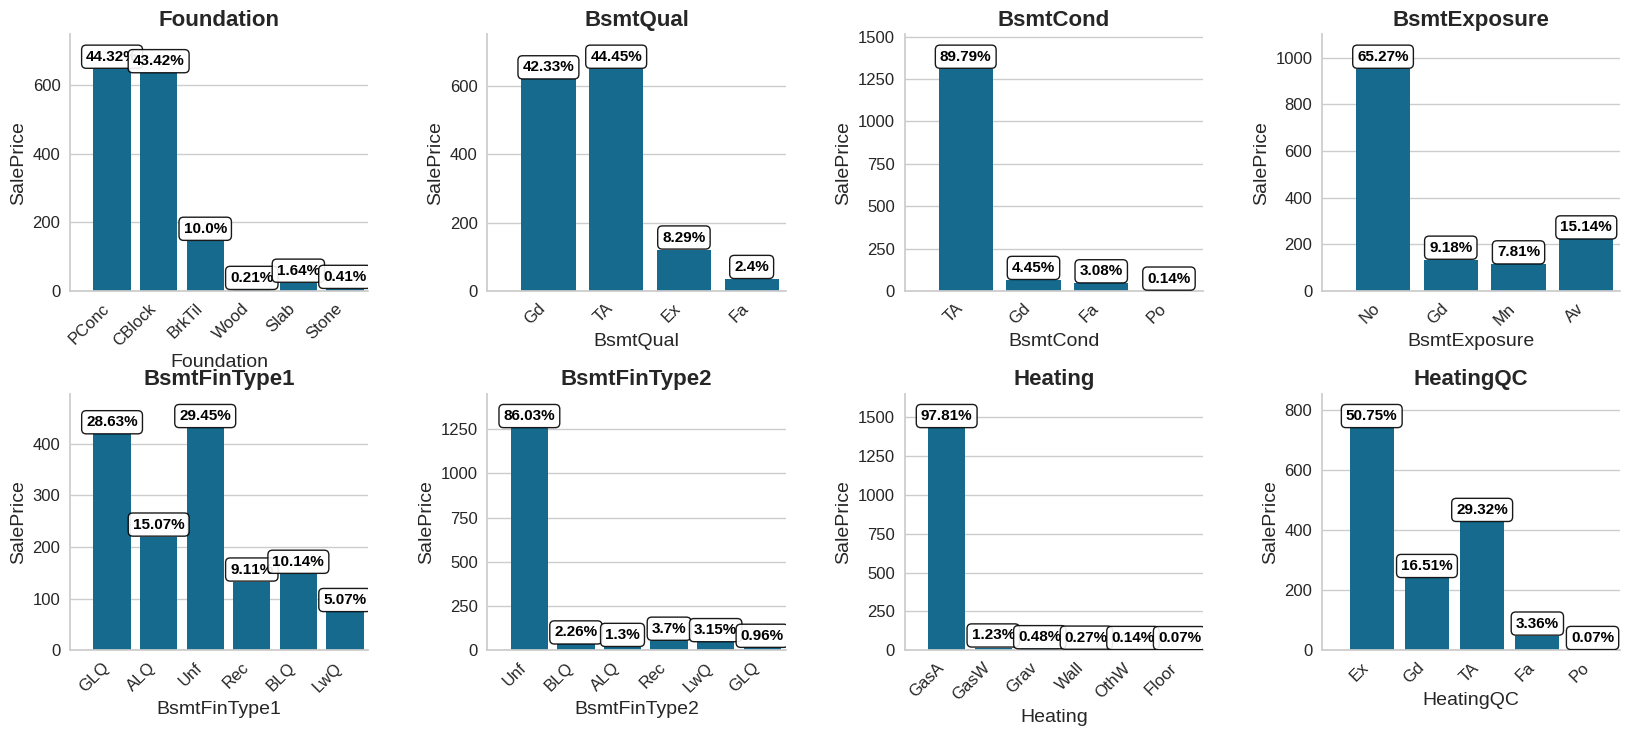

In [93]:
# nrows=(len(col_subplots) + ncols - 1) // ncols
# create a countplot
cat_features = [col for col in categorical_variables if train[col].nunique() < 10]

if len(cat_features) > 7:
    nrows1 = 2
    ncols1 = 4
    nrows2 = (len(cat_features) - 8 + 1) // 3
    ncols2 = 3
else:
    nrows1 = 2
    ncols1 = 3
    nrows2 = 0
    ncols2 = 0

fig, axes = plt.subplots(ncols=ncols1, nrows=nrows1, figsize=(20, 8))
axes_it = axes.flat

# Iterate over the categorical variables and plot them on the first plot
for col, ax in zip(cat_features[:8], axes_it):
    sns.countplot(data=train, x=col, ax=ax)
    ax.set_xlabel(f"{col}", fontsize=14)
    ax.set_ylabel('SalePrice', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f'{col}', fontweight='bold', fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        # Get the maximum height of the bars
    max_height = max([p.get_height() for p in ax.patches])
    for p in ax.patches:
    # Calculate percentage of each category and round to 2 decimal places
      percentage = round(p.get_height()/len(train)*100, 2)
    # Calculate y-position for annotation
      y_pos = p.get_height() + ax.get_ylim()[1]*0.01
    # Calculate x-position for annotation
      x_pos = p.get_x() + p.get_width() / 2.
    # Set annotation properties
      ax.annotate(f'{percentage}%',
                (x_pos, y_pos),
                ha='center', va='center', fontsize=11, color='black', fontweight='bold',
                textcoords='offset points', xytext=(0, 7),
                bbox=dict(boxstyle='round', fc='white', ec='black', lw=1, alpha=0.9),
                clip_on=True, zorder=10)
    y_max = ax.get_ylim()[1]
    ax.set_ylim(0, y_max * 1.1)
# Add the suptitle and adjust the layout

fig.suptitle(f'Categorical Feature vs Target\n\n\n', ha='center', fontweight='bold', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

fig.suptitle(f'Categorical Feature vs SalePrice\n\n\n', ha='center',  fontweight='bold', fontsize=20)
plt.tight_layout()


if len(cat_features) > 7:
    fig, axes = plt.subplots(ncols=ncols1, nrows=nrows1, figsize=(20, 8))
    axes_it = axes.flat

    # Iterate over the remaining categorical variables and plot them on the second plot
    for col, ax in zip(cat_features[8:17], axes_it):
        sns.countplot(data=train, x=col, ax=ax)
        ax.set_xlabel(f"{col}", fontsize=14)
        ax.set_ylabel('SalePrice', fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(f'{col}', fontweight='bold', fontsize=16)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        max_height = max([p.get_height() for p in ax.patches])
        for p in ax.patches:
    # Calculate percentage of each category and round to 2 decimal places
          percentage = round(p.get_height()/len(train)*100, 2)
    # Calculate y-position for annotation
          y_pos = p.get_height() + ax.get_ylim()[1]*0.01
    # Calculate x-position for annotation
          x_pos = p.get_x() + p.get_width() / 2.
    # Set annotation properties
          ax.annotate(f'{percentage}%',
                (x_pos, y_pos),
                ha='center', va='center', fontsize=11, color='black', fontweight='bold',
                textcoords='offset points', xytext=(0, 7),
                bbox=dict(boxstyle='round', fc='white', ec='black', lw=1, alpha=0.9),
                clip_on=True, zorder=10)
        y_max = ax.get_ylim()[1]
        ax.set_ylim(0, y_max * 1.1)
        left_padding = 0.4  # Adjust the padding as needed
        ax.set_xlim(ax.get_xlim()[0]-left_padding, ax.get_xlim()[1])

    # Adjust the layout and save the second plot as a PNG file
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    # Show the second plot
    plt.show()

if len(cat_features) > 7:
    fig, axes = plt.subplots(ncols=ncols1, nrows=nrows1, figsize=(20, 8))
    axes_it = axes.flat

    # Iterate over the remaining categorical variables and plot them on the second plot
    for col, ax in zip(cat_features[17:], axes_it):
        sns.countplot(data=train, x=col, ax=ax)
        ax.set_xlabel(f"{col}", fontsize=14)
        ax.set_ylabel('SalePrice', fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(f'{col}', fontweight='bold', fontsize=16)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        max_height = max([p.get_height() for p in ax.patches])
        for p in ax.patches:
    # Calculate percentage of each category and round to 2 decimal places
          percentage = round(p.get_height()/len(train)*100, 2)
    # Calculate y-position for annotation
          y_pos = p.get_height() + ax.get_ylim()[1]*0.01
    # Calculate x-position for annotation
          x_pos = p.get_x() + p.get_width() / 2.
    # Set annotation properties
          ax.annotate(f'{percentage}%',
                (x_pos, y_pos),
                ha='center', va='center', fontsize=11, color='black', fontweight='bold',
                textcoords='offset points', xytext=(0, 7),
                bbox=dict(boxstyle='round', fc='white', ec='black', lw=1, alpha=0.9),
                clip_on=True, zorder=10)
        y_max = ax.get_ylim()[1]
        ax.set_ylim(0, y_max * 1.1)
        left_padding = 0.4  # Adjust the padding as needed
        ax.set_xlim(ax.get_xlim()[0]-left_padding, ax.get_xlim()[1])

    # Adjust the layout and save the second plot as a PNG file
    plt.subplots_adjust(wspace=0.4, hspace=0.4)


## **Continuous Feature vs SalePrice**

In [94]:
# take the continuous feature
continuous=[i for i in continuous_variables if i not in ["Id","SalePrice"]]

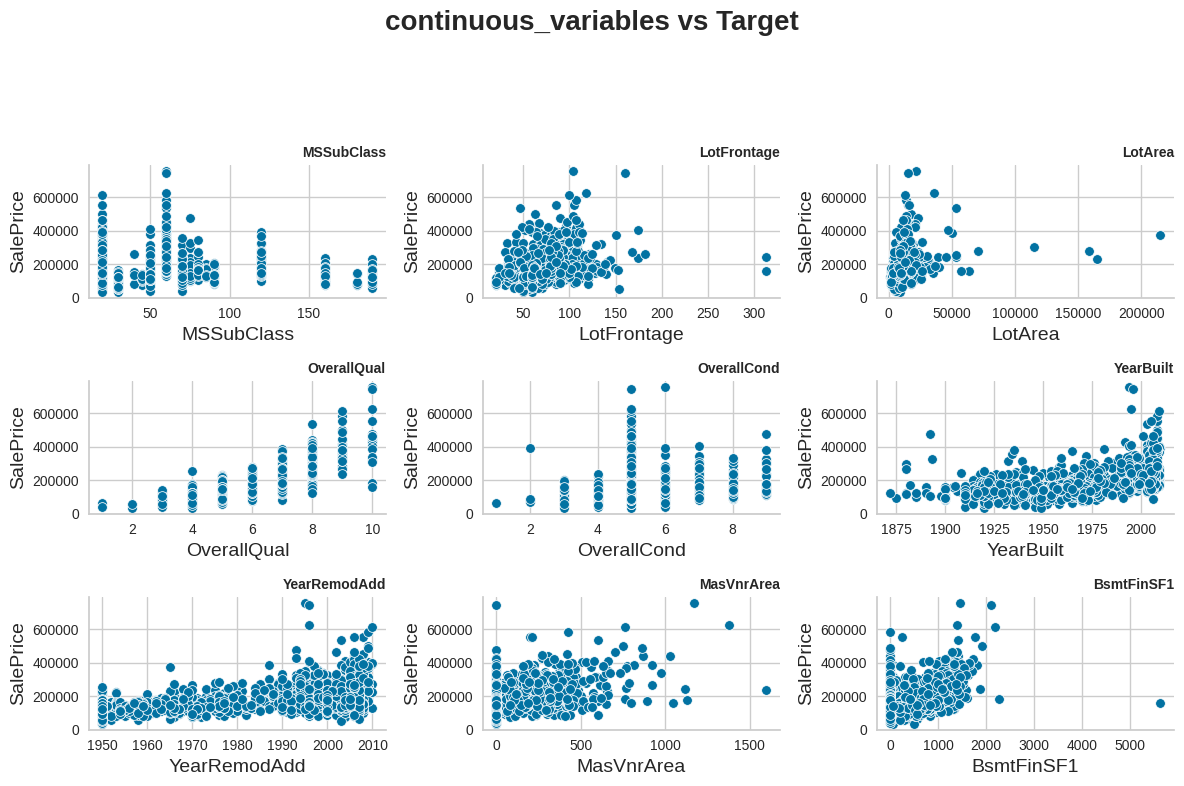

In [95]:
# nrows=(len(col_subplots) + ncols - 1) // ncols
#scatter plot the continuous value
fix, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 8))
axes_it = axes.flat

for col, ax in zip(continuous, axes_it):

    sns.scatterplot(data=train,x=col,y=train['SalePrice'],ax=ax)
    ax.set_ylabel(''); ax.spines['top'].set_visible(False),
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right',
                 weight='bold', fontsize=10)
    ax.set_xlabel(f"{col}", fontsize=14)
    ax.set_ylabel('SalePrice', fontsize=14)

fix.suptitle(f'continuous_variables vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

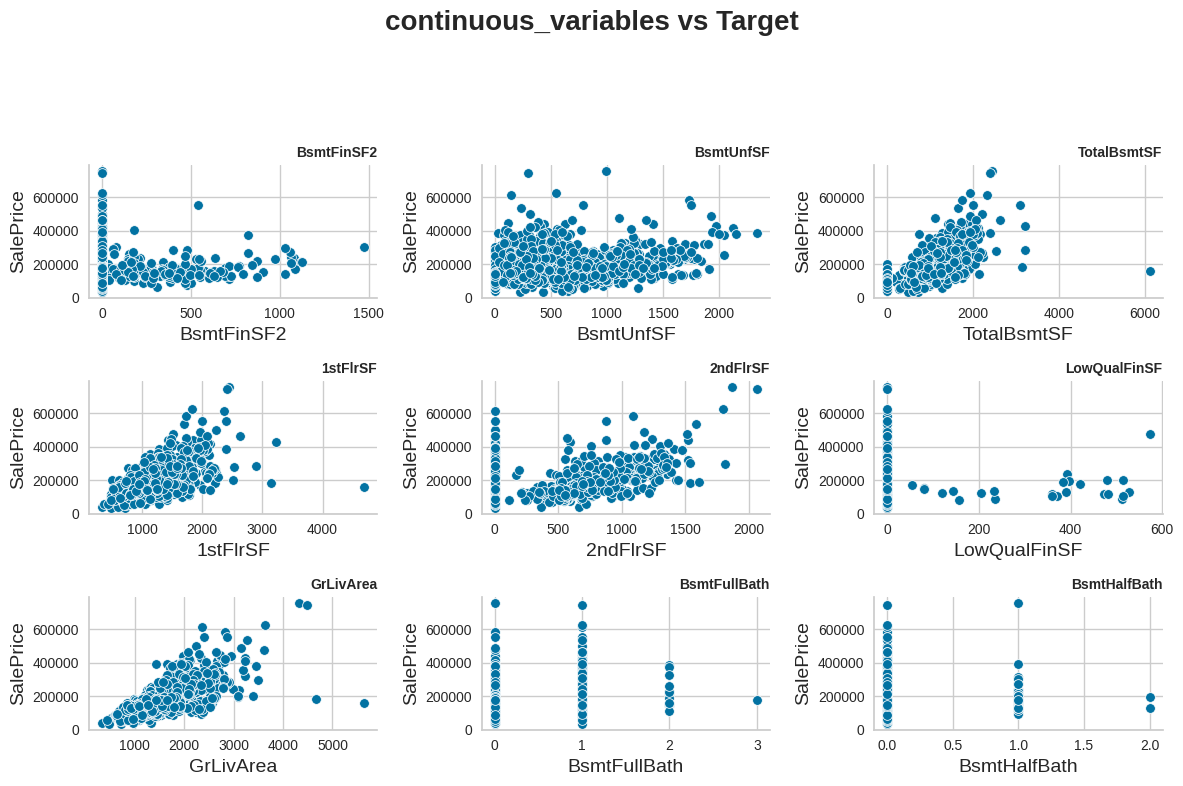

In [96]:
# nrows=(len(col_subplots) + ncols - 1) // ncols
fix, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 8))
axes_it = axes.flat

for col, ax in zip(continuous[9:18], axes_it):

    sns.scatterplot(data=train,x=col,y=train['SalePrice'],ax=ax)
    ax.set_ylabel(''); ax.spines['top'].set_visible(False),
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right',
                 weight='bold', fontsize=10)
    ax.set_xlabel(f"{col}", fontsize=14)
    ax.set_ylabel('SalePrice', fontsize=14)

fix.suptitle(f'continuous_variables vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

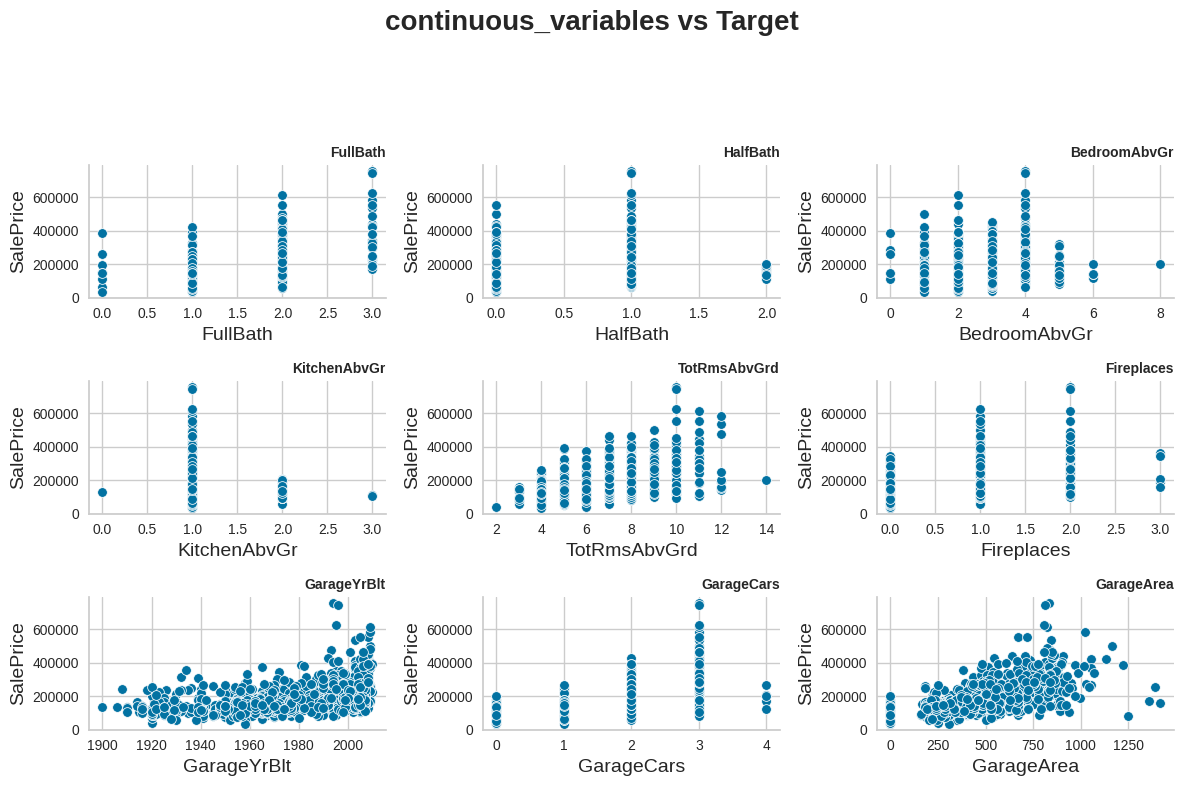

In [97]:
# nrows=(len(col_subplots) + ncols - 1) // ncols
fix, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 8))
axes_it = axes.flat

for col, ax in zip(continuous[18:], axes_it):

    sns.scatterplot(data=train,x=col,y=train['SalePrice'],ax=ax)
    ax.set_ylabel(''); ax.spines['top'].set_visible(False),
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right',
                 weight='bold', fontsize=10)
    ax.set_xlabel(f"{col}", fontsize=14)
    ax.set_ylabel('SalePrice', fontsize=14)

fix.suptitle(f'continuous_variables vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

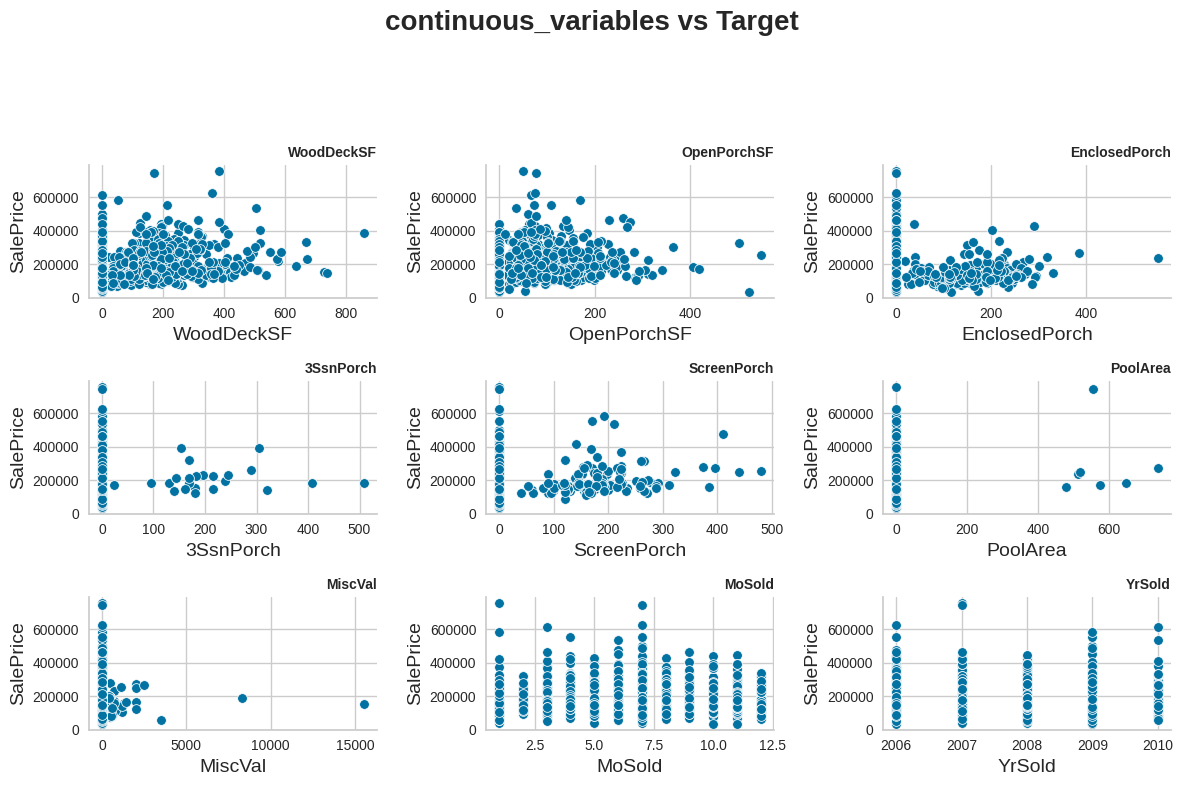

In [98]:
# nrows=(len(col_subplots) + ncols - 1) // ncols
fix, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 8))
axes_it = axes.flat

for col, ax in zip(continuous[27:], axes_it):

    sns.scatterplot(data=train,x=col,y=train['SalePrice'],ax=ax)
    ax.set_ylabel(''); ax.spines['top'].set_visible(False),
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right',
                 weight='bold', fontsize=10)
    ax.set_xlabel(f"{col}", fontsize=14)
    ax.set_ylabel('SalePrice', fontsize=14)

fix.suptitle(f'continuous_variables vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

# **Feature Engineering**

## **Dropping Outlier**

The outlier is not specifed what the paper do, so we make initiative to drop the outlier

In [99]:
# Drop outlier from the scatter plot
drop1=train[(train.TotalBsmtSF > 4500) & (train.SalePrice < 200000)].index
drop2=train[(train['1stFlrSF'] > 4000) & (train.SalePrice < 200000)].index
drop3=train[(train['GrLivArea'] > 4000) & (train.SalePrice < 300000)].index
drop4=train[(train['MasVnrArea'] > 1500) & (train.SalePrice < 300000)].index
drop5=train[train["BsmtFinSF1"]>5000].index
drop6=train[train["TotalBsmtSF"]>6000].index
drop7=train[(train['GarageArea'] > 1200) & (train.SalePrice < 350000)].index

In [100]:
drop_index = drop1.append([drop2, drop3, drop4, drop5, drop6, drop7])


In [101]:
train=train.drop(drop_index)

In [102]:
cat10 = train[categorical_variables].loc[:, train[categorical_variables].nunique() <10]
cat10=cat10.columns

In [58]:
null_train=evaluate_null(train).sort_values(by='null_value',ascending=False)
px.bar(data_frame=null_train[null_train['null_value']>0],y='%null_value',x='columns')

In [59]:
null_test=evaluate_null(test).sort_values(by='null_value',ascending=False)
px.bar(data_frame=null_test[null_test['null_value']>0],y='%null_value',x='columns')

## **Change Numeric To categorical**

In [103]:
# There are some wrong feature type (ex : it should be integer but the dataset original is str), so we correct it
def change(train) :
  train['MSSubClass'] = train['MSSubClass'].apply(str)

  #Changing OverallCond into a categorical variable
  train['OverallCond'] = train['OverallCond'].astype(str)


  #Year and month sold are transformed into categorical features.
  train['YrSold'] = train['YrSold'].astype(str)
  train['MoSold'] = train['MoSold'].astype(str)
  return train

In [104]:
train=change(train)
test=change(test)

## **Filling and Dropping Missing Data**

We drop some missing data and also fill the categorical with Not Available

In [105]:
# Fill missing value and also drop some
class dropper(BaseEstimator,TransformerMixin) :
  def fit(self,X,y=None) :
    return self
  def delMorecolumns(self,X) :
    data=X
    cols=data.loc[:,data.isnull().sum()/len(data)>0.50].columns
    for i in cols  :
      if data[i].dtype=="O" :
        data[i].fillna("Not Available",inplace=True)
    return data
  def transform(self,X) :
    return self.delMorecolumns(X)

class garage(BaseEstimator,TransformerMixin) :
  def fit(self,X,y=None) :
    return self
  def Garage(self,X) :
    data=X
    garage=[j for j in data.columns if ("Garage") in j]
    for i in garage  :
      if data[i].dtype=="O" :
        data[i].fillna("Not Available",inplace=True)
    return data
  def transform(self,X) :
    return self.Garage(X)

class fireplace(BaseEstimator,TransformerMixin) :
  def fit(self,X,y=None) :
    return self
  def fireplace(self,X) :
    data=X
    data["FireplaceQu"].fillna("Not Available",inplace=True)
    return data
  def transform(self,X) :
    return self.fireplace(X)

class LotContour(BaseEstimator,TransformerMixin) :
  def fit(self,X,y=None) :
    return self
  def LotFrontage(self,X) :
    data=X
    data["LotFrontage"]=data.groupby(["MSZoning","LotShape","LandContour","LotConfig","LandSlope"])["LotFrontage"].apply(lambda x:x.fillna(x.mean()))
    data["LotFrontage"]=data["LotFrontage"].fillna(np.mean(data["LotFrontage"]))
    return data
  def transform(self,X) :
    return self.LotFrontage(X)

class MasVyn(BaseEstimator,TransformerMixin) :
  def fit(self,X,y=None) :
    return self
  def Masvyn(self,X) :
    data=X
    mas=["MasVnrType"]
    for i in mas :
      if data[i].dtype=="O" :
        data[i].fillna("Missing",inplace=True)
    return data
  def transform(self,X) :
    return self.Masvyn(X)

In [106]:
nullPP=Pipeline([(">50",dropper()),
                 ("garage",garage()),
                 ("frpl",fireplace()),
                 ("LotFrontage",LotContour()),
                 ("MasVyn",MasVyn())



])

In [107]:
a=nullPP.fit_transform(train)


In [108]:
b=nullPP.transform(test)

In [109]:
a.drop(a[a["Electrical"].isnull()==True].index,inplace=True)

In [110]:
def GarageYr(data) :
  return data.drop("GarageYrBlt",axis=1)
def MasVnrArea(data) :
  index=data[data["MasVnrArea"].isnull()==True].index
  data=data.drop(index)
  return data

In [111]:
# Impute the missing value with mean and most_frequent
def imputer(data) :
  nan=data.loc[:, data.isnull().sum() >0].columns
  numeric=data[nan].select_dtypes(exclude="O").columns
  cat=data[nan].select_dtypes(include="O").columns

  imp = SimpleImputer(missing_values=np.nan,strategy='mean')
  imp2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
  data[numeric]=imp.fit_transform(data[numeric])
  data[cat]=imp2.fit_transform(data[cat])
  return data

In [112]:
def bsmt(data) :
  bsmt=[i for i in data.columns if ("Bsmt") in i ]
  for i in bsmt :
    if data[i].dtype=="O" :
      data[i]=data[i].fillna("Not Available")
    else :
      data[i]=data[i].fillna(np.mean(data[i]))

  return data

In [113]:
a=GarageYr(a)
a=MasVnrArea(a)
a=bsmt(a)


In [114]:
b=GarageYr(b)
b=bsmt(b)
b=imputer(b)
b["MasVnrArea"]=b["MasVnrArea"].fillna(np.mean(b["MasVnrArea"]))

In [115]:
c=evaluate_null(a).sort_values(by='null_value',ascending=False)
px.bar(data_frame=c[c['null_value']>0],y='%null_value',x='columns')

In [116]:
c=evaluate_null(b).sort_values(by='null_value',ascending=False)
px.bar(data_frame=c[c['null_value']>0],y='%null_value',x='columns')

## **Some Feature selection**

In [ ]:
# drop some feature
def selected_features(data) :
  dropedfeatures=["GarageArea","1stFlrSF","TotRmsAbvGrd"]
  data=data.drop(dropedfeatures,axis=1)
  return data

In [ ]:
a=selected_features(a)
b=selected_features(b)

<ipython-input-29-1b7761224509>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



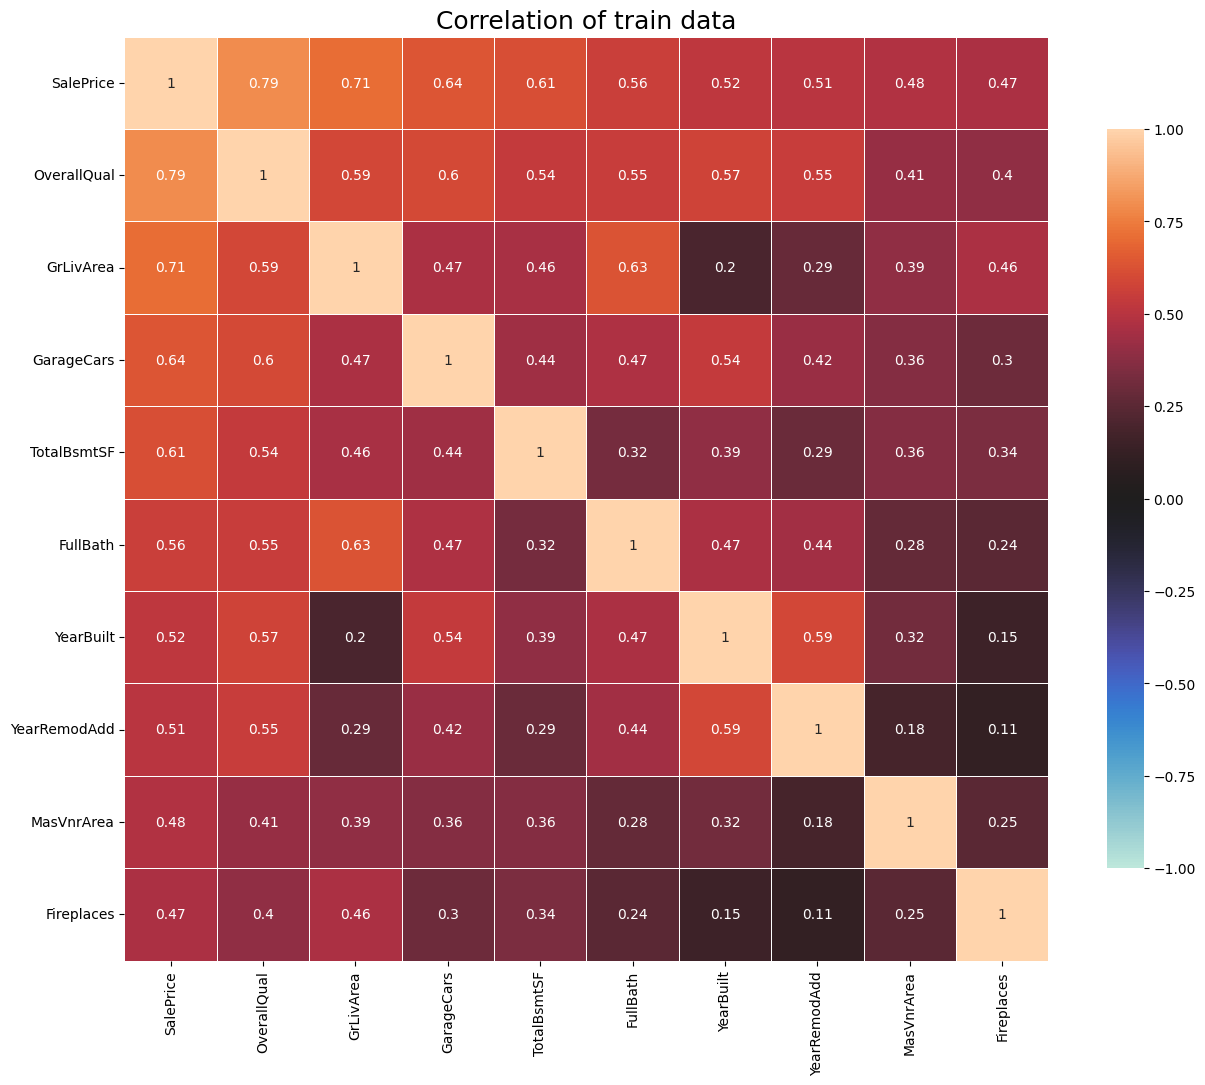

In [ ]:
corr=a.corr()['SalePrice']
sorted_corr=abs(corr).sort_values(axis=0,ascending=False)
sorted_index=sorted_corr.head(10).index
sorted_train=train[sorted_index]
corr=sorted_train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation of train data', fontsize=18)



# **Data split**


In [117]:
#Numeric features
train_num=a.drop(['SalePrice',"Id"],axis=1).select_dtypes(exclude='object').columns
#categorical features
train_cat=a.drop(['SalePrice',"Id"],axis=1).select_dtypes(include='object').columns
le=preprocessing.LabelEncoder()

# Transforming Num Data With Box Cox

We transform some feature that is very skew with box cox, we also transform with box cox the target "SalePrice"


<Figure size 800x550 with 0 Axes>

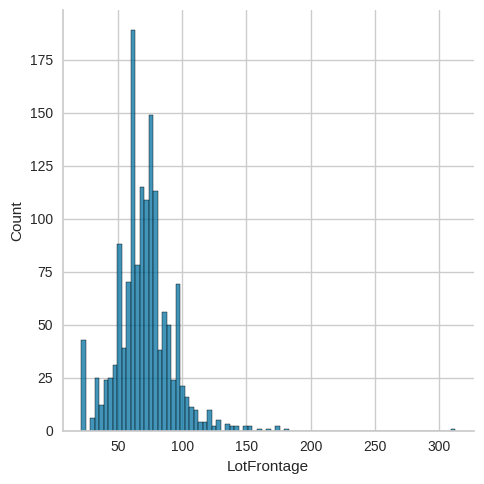

<Figure size 800x550 with 0 Axes>

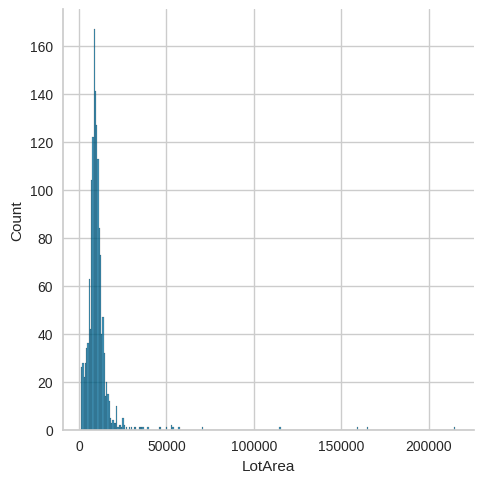

<Figure size 800x550 with 0 Axes>

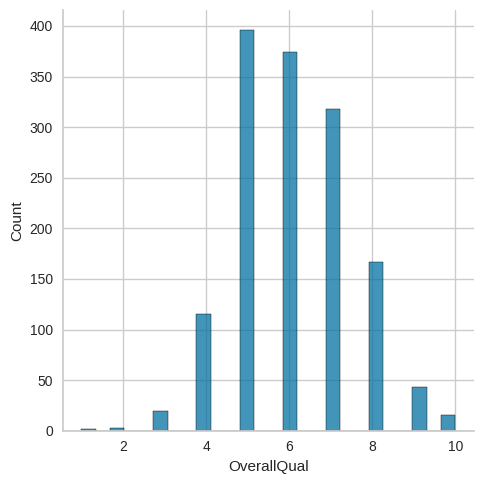

<Figure size 800x550 with 0 Axes>

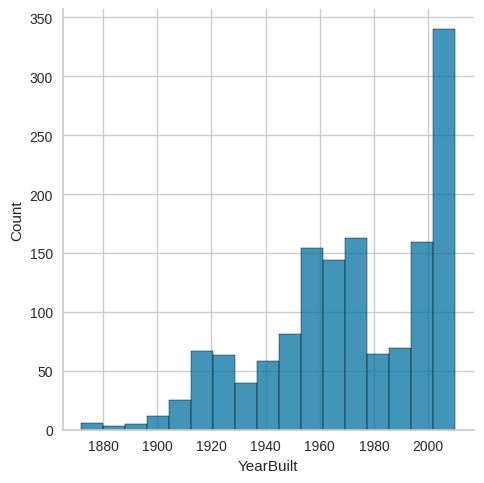

<Figure size 800x550 with 0 Axes>

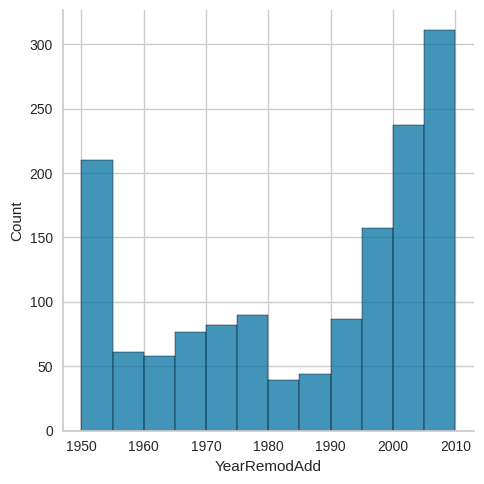

<Figure size 800x550 with 0 Axes>

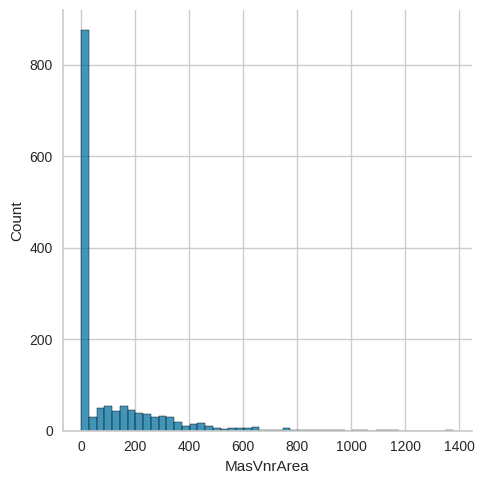

<Figure size 800x550 with 0 Axes>

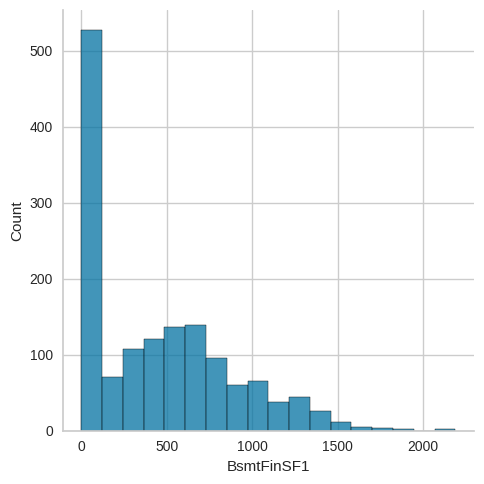

<Figure size 800x550 with 0 Axes>

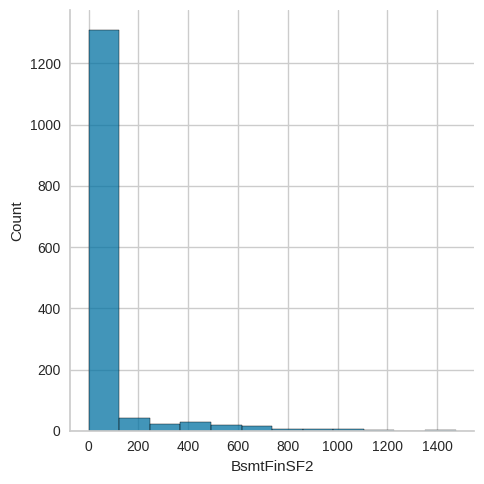

<Figure size 800x550 with 0 Axes>

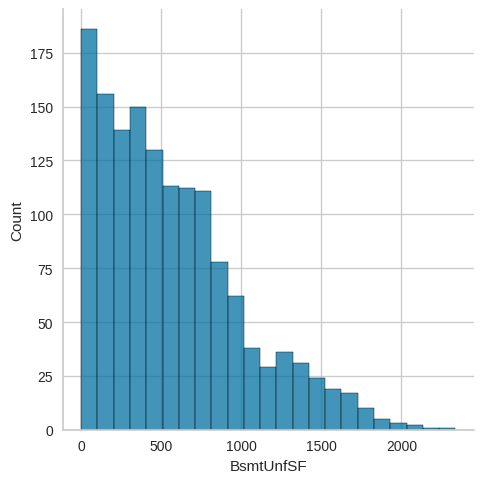

<Figure size 800x550 with 0 Axes>

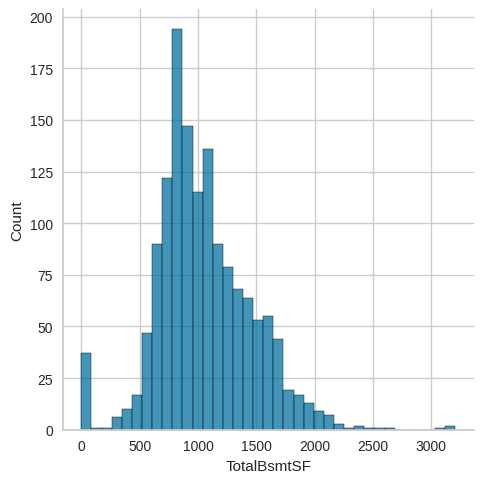

<Figure size 800x550 with 0 Axes>

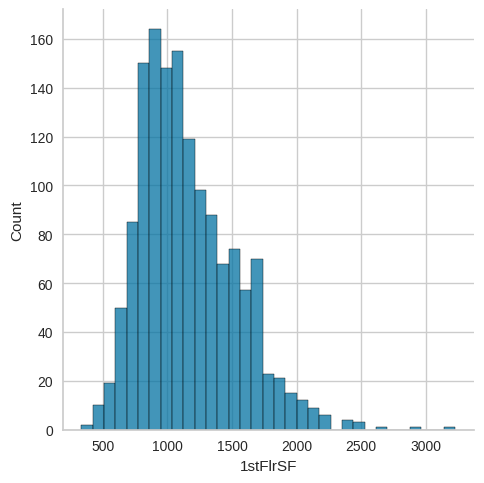

<Figure size 800x550 with 0 Axes>

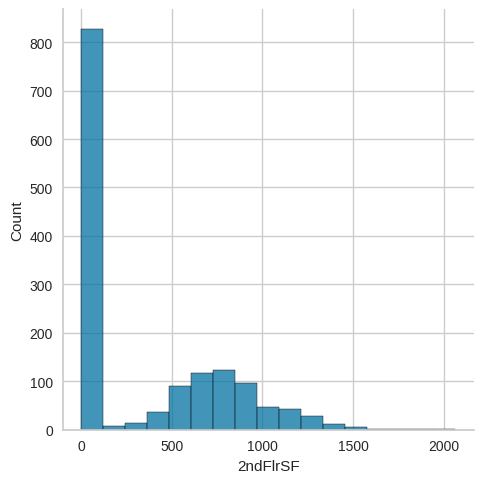

<Figure size 800x550 with 0 Axes>

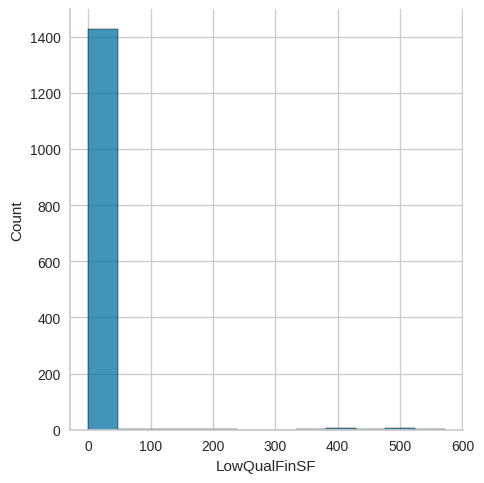

<Figure size 800x550 with 0 Axes>

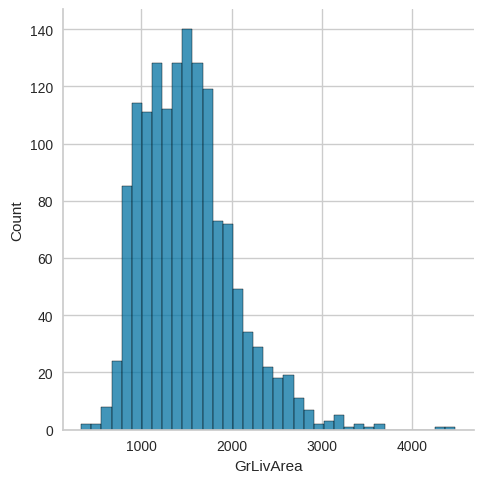

<Figure size 800x550 with 0 Axes>

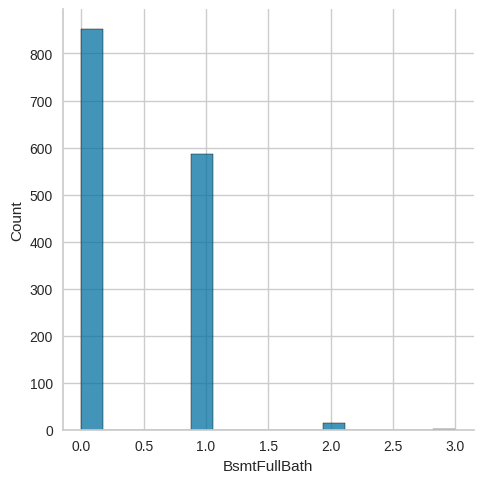

<Figure size 800x550 with 0 Axes>

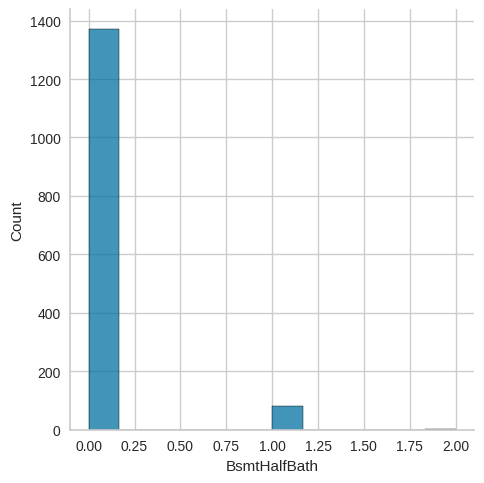

<Figure size 800x550 with 0 Axes>

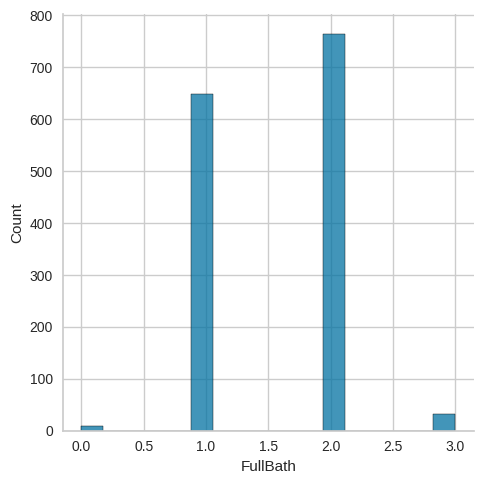

<Figure size 800x550 with 0 Axes>

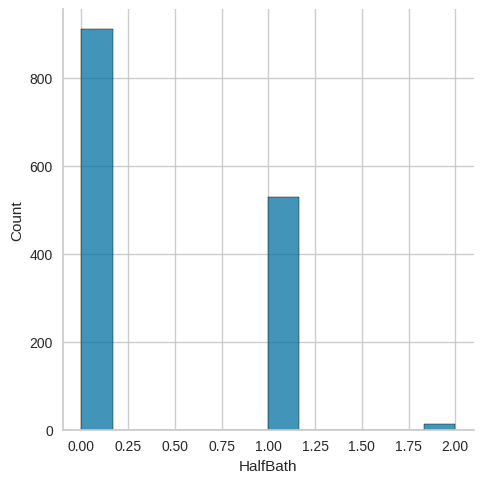

<Figure size 800x550 with 0 Axes>

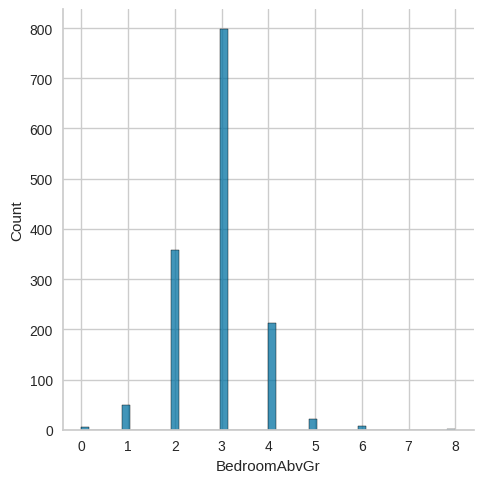

<Figure size 800x550 with 0 Axes>

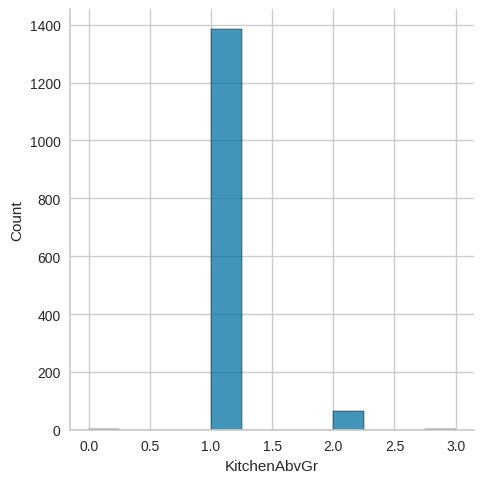

<Figure size 800x550 with 0 Axes>

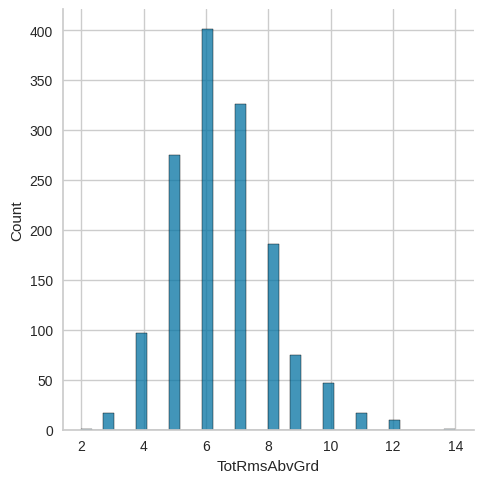

<Figure size 800x550 with 0 Axes>

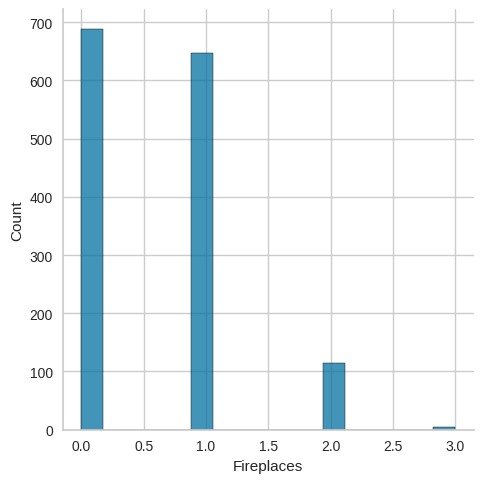

<Figure size 800x550 with 0 Axes>

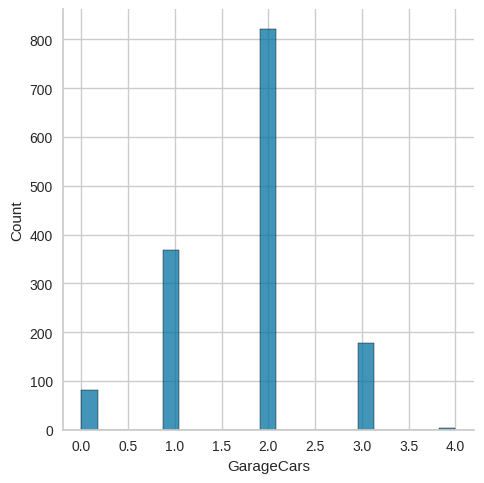

<Figure size 800x550 with 0 Axes>

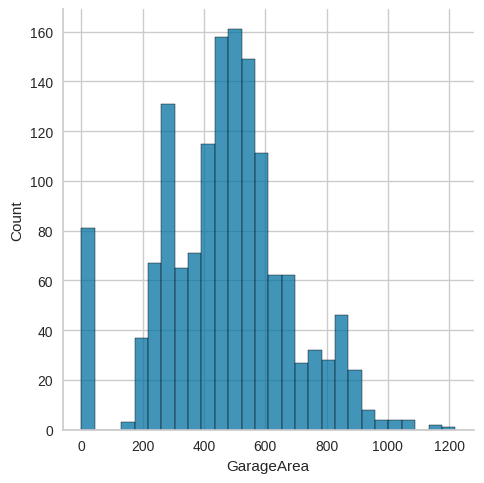

<Figure size 800x550 with 0 Axes>

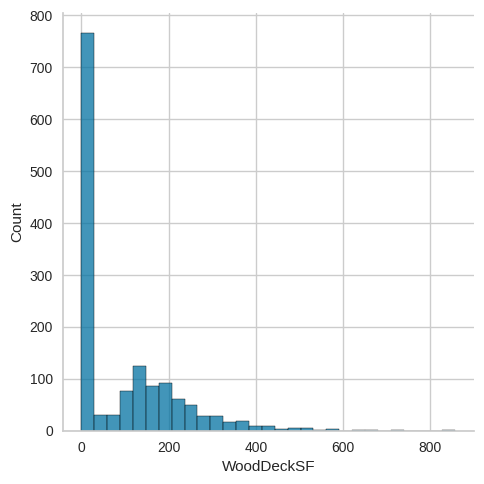

<Figure size 800x550 with 0 Axes>

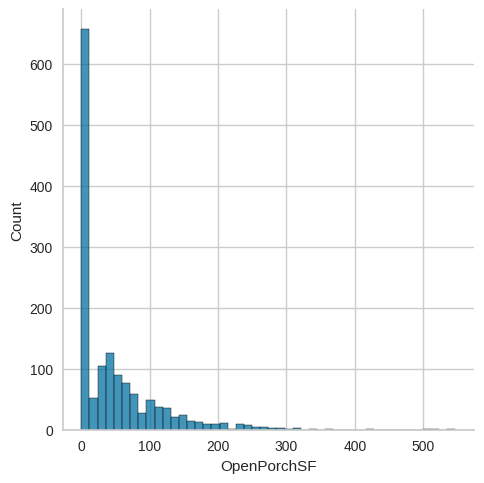

<Figure size 800x550 with 0 Axes>

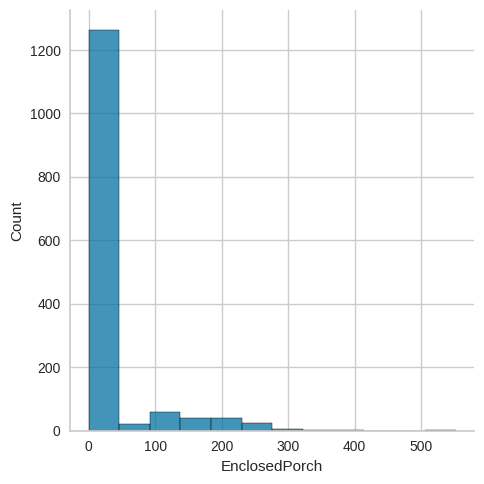

<Figure size 800x550 with 0 Axes>

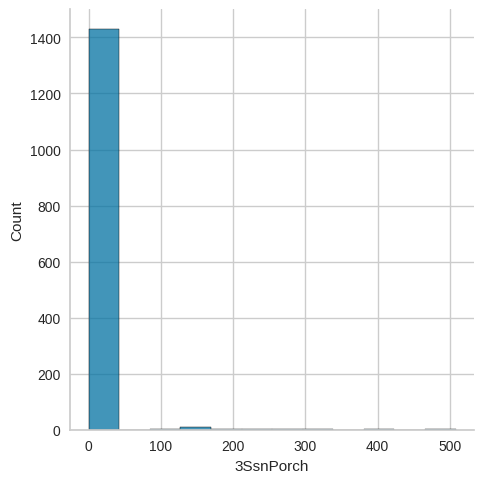

<Figure size 800x550 with 0 Axes>

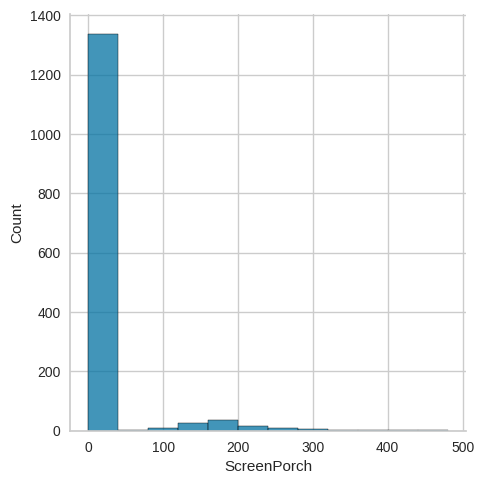

<Figure size 800x550 with 0 Axes>

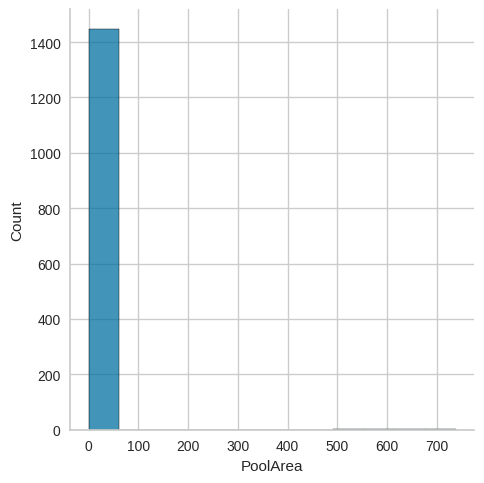

<Figure size 800x550 with 0 Axes>

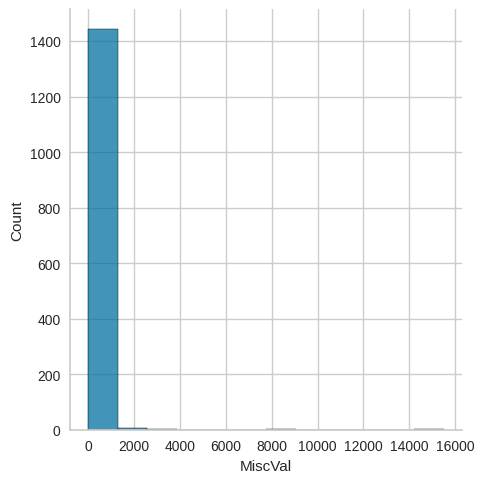

In [118]:
from scipy.stats import skew
for i in train_num :
  plt.figure()
  sns.displot(train[i])


In [119]:
skew=["BsmtUnfSF", "BsmtFinSF1", "MasVnrArea", "LotArea"]
train_2 = a.copy()

for feature in skew:
    transformed_data, lambda_val = stats.boxcox(a[feature].values + 1 )
    train_2[feature] = transformed_data


<Figure size 640x480 with 0 Axes>

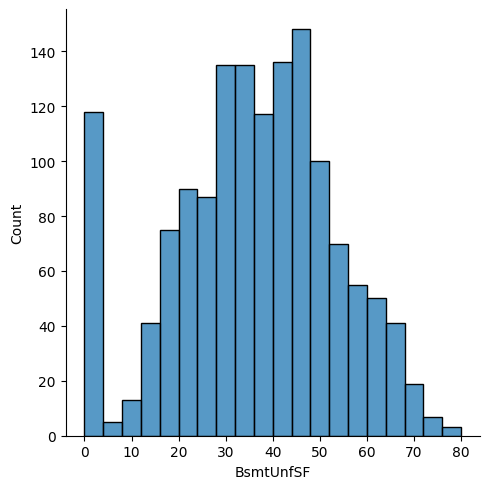

<Figure size 640x480 with 0 Axes>

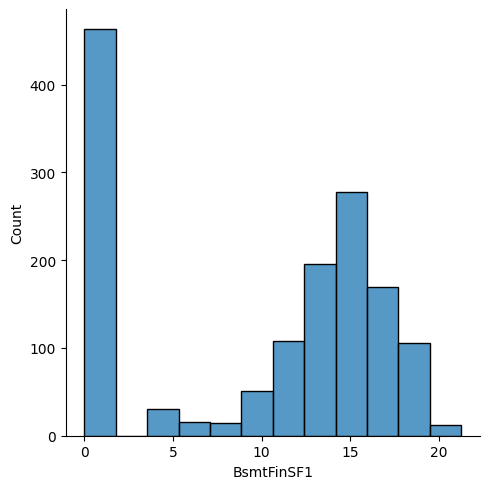

<Figure size 640x480 with 0 Axes>

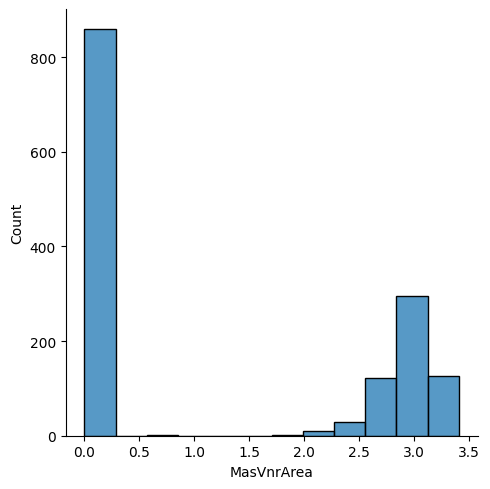

<Figure size 640x480 with 0 Axes>

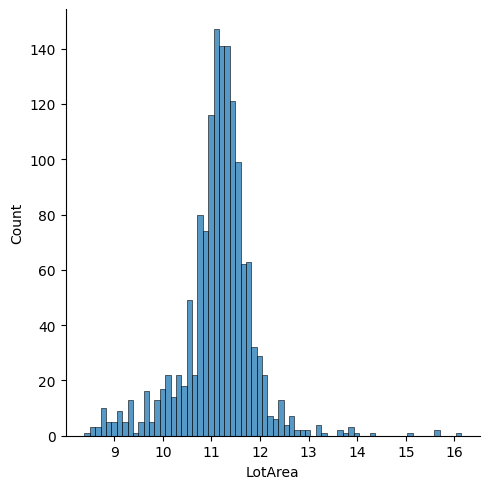

In [100]:
for i in skew :
  plt.figure()
  sns.displot(train_2[i])

# Labelling

We label the categorical with label encoder

In [120]:
X=train_2.drop(["Id","SalePrice"],axis=1)
# X["SalePrice"]=StandardScaler().fit_transform(a[["SalePrice"]])

In [121]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for feature in X.columns:
    X[feature] = label_encoder.fit_transform(X[feature])


In [122]:
y=train_2["SalePrice"]
transformed_data, lambda_val = stats.boxcox(y+0.000000001 )
y=transformed_data

In [123]:
# For pycaret only
train_2['SalePrice']=transformed_data

In [124]:
y

array([7.81600211, 7.763522  , 7.84207409, ..., 7.90746737, 7.66955385,
       7.68393604])

In [125]:
test=b.copy()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [127]:
X_train

MSSubClass  MSZoning  LotFrontage  LotArea  Street  ...  MiscVal  \
386            8         3           34      320       1  ...        0   
200            4         4           67      343       1  ...        0   
65             9         3           62      493       1  ...        0   
944            4         3           36      921       1  ...        0   
770           13         3           36      206       1  ...        0   
...          ...       ...          ...      ...     ...  ...      ...   
769            9         3           19     1053       1  ...        0   
841           10         4           37      597       1  ...        0   
1227           4         3           56      384       1  ...        0   
563            8         3           46     1023       1  ...        0   
690            0         4           21       79       1  ...        0   

      MoSold  YrSold  SaleType  SaleCondition  
386        7       0         8              1  
200        5       4         8              4  
65         1       1         8              4  
944        0       3         0              0  
770        6       3         8              4  
...      ...     ...       ...            ...  
769        8       4         8              4  
841        8       2         8              4  
1227       3       2         8              4  
563        9       2         8              4  
690        7       2         8              4  

[867 rows x 78 columns]

In [138]:
X_test

MSSubClass  MSZoning  LotFrontage  LotArea  Street  ...  MiscVal  \
1336          14         3           76      442       1  ...        0   
479            5         4           24      133       1  ...        0   
184            8         3           82      221       1  ...        0   
304           11         4           76     1003       1  ...        0   
992            9         3           67      506       1  ...        0   
...          ...       ...          ...      ...     ...  ...      ...   
698            4         3           45      324       1  ...        0   
1338           9         3           85      869       1  ...        0   
897           14         3           44      182       1  ...        0   
369            4         3           88      517       1  ...        0   
1444           4         3           42      334       1  ...        0   

      MoSold  YrSold  SaleType  SaleCondition  
1336       2       2         8              4  
479        5       1         8              2  
184        8       0         8              4  
304        7       2         8              4  
992        9       1         8              4  
...      ...     ...       ...            ...  
698        6       4         8              4  
1338       8       0         8              4  
897        8       3         8              2  
369        5       4         8              4  
1444       2       1         8              4  

[578 rows x 78 columns]

# **Modelling**

## Using CV Scores

In [129]:
# Import all model & evaluation
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import BayesianRidge


In [132]:

# This is using CV Scores, we use all the train data without splitting
# Initialize models
init_models = {
    'XGBOOST': XGBRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'AdaBoost': AdaBoostRegressor(),
    'Polynomial Regression': PolynomialFeatures(include_bias=False),
    'Elastic Net': ElasticNet(),
    'SVR': SVR(),
    'Gaussian Process': GaussianProcessRegressor(),
    'MLP Regressor': MLPRegressor(),
    'Kernel Regression': KernelRidge(),
    'Bayesian Regression': BayesianRidge()
}

# Initialize lists to store scores
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

metrics = {
    'R2 Score': r2_score,
    'Mean Squared Error': mean_squared_error,
    'Root Mean Squared Error': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'Mean Squared Log Error': mean_squared_log_error,
    'Mean Absolute Error': mean_absolute_error
}

models_results = []

# Loop through the models
for key, model in init_models.items():
    if isinstance(model, PolynomialFeatures):
        # If the model is Polynomial Regression, fit and transform the data
        X_poly_train = model.fit_transform(X)
        model = LinearRegression()  # Linear regression on polynomial features
        model.fit(X_poly_train, y)
    else:
        model.fit(X, y)
    model_results = {'Model Name': key}
    # Calculate evaluation metrics using cross-validation
    for metric_name, metric_func in metrics.items():
        scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(metric_func))
        model_results[metric_name] = np.mean(scores)
    models_results.append(model_results)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3295
[LightGBM] [Info] Number of data points in the train set: 1445, number of used features: 73
[LightGBM] [Info] Start training from score 7.727974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3018
[LightGBM] [Info] Number of data points in the train set: 1156, number of used features: 71
[LightGBM] [Info] Start training from score 7.726875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

In [133]:
# Create a DataFrame to display the scores
models_scores = pd.DataFrame(models_results)
models_scores = models_scores.sort_values(by='R2 Score', ascending=False)
models_scores.head(len(init_models))

Model Name  R2 Score  Mean Squared Error  \
14    Bayesian Regression      0.90                0.00   
5                   Ridge      0.90                0.00   
4       Linear Regression      0.90                0.00   
8   Polynomial Regression      0.90                0.00   
3                    LGBM      0.89                0.00   
..                    ...       ...                 ...   
6                   Lasso      0.73                0.01   
1           Decision Tree      0.72                0.01   
13      Kernel Regression     -0.72                0.04   
12          MLP Regressor   -402.10               11.35   
11       Gaussian Process  -2566.50               59.55   

    Root Mean Squared Error  Mean Squared Log Error  Mean Absolute Error  
14                     0.05                    0.00                 0.03  
5                      0.05                    0.00                 0.03  
4                      0.05                    0.00                 0.03  
8                      0.05                    0.00                 0.03  
3                      0.05                    0.00                 0.03  
..                      ...                     ...                  ...  
6                      0.08                    0.00                 0.06  
1                      0.08                    0.00                 0.06  
13                     0.19                    0.00                 0.10  
12                     3.16                     NaN                 2.53  
11                     7.72                    4.67                 7.71  

[15 rows x 6 columns]

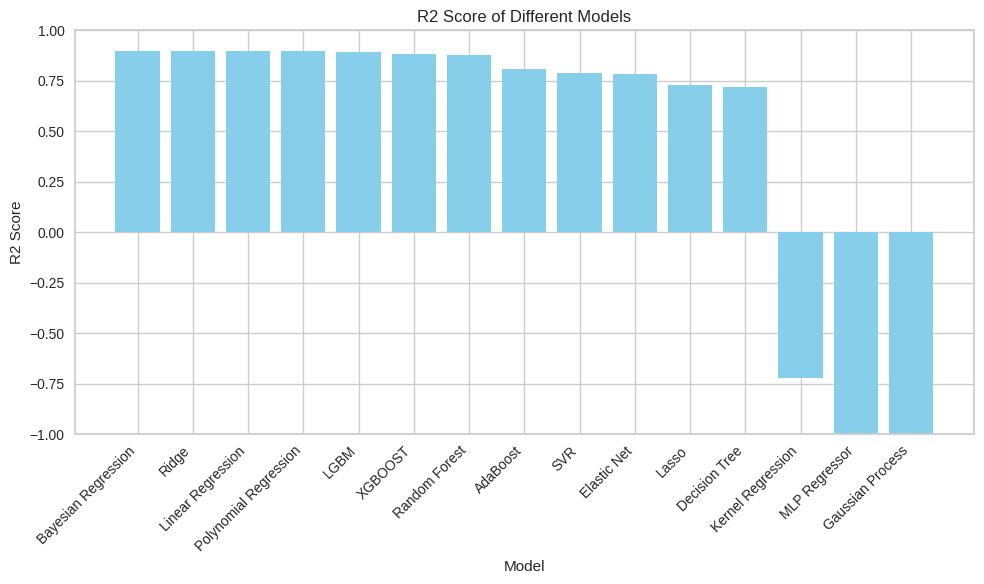

In [134]:
models_scores_sorted = models_scores.sort_values(by='R2 Score', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models_scores_sorted['Model Name'], models_scores_sorted['R2 Score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score of Different Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()


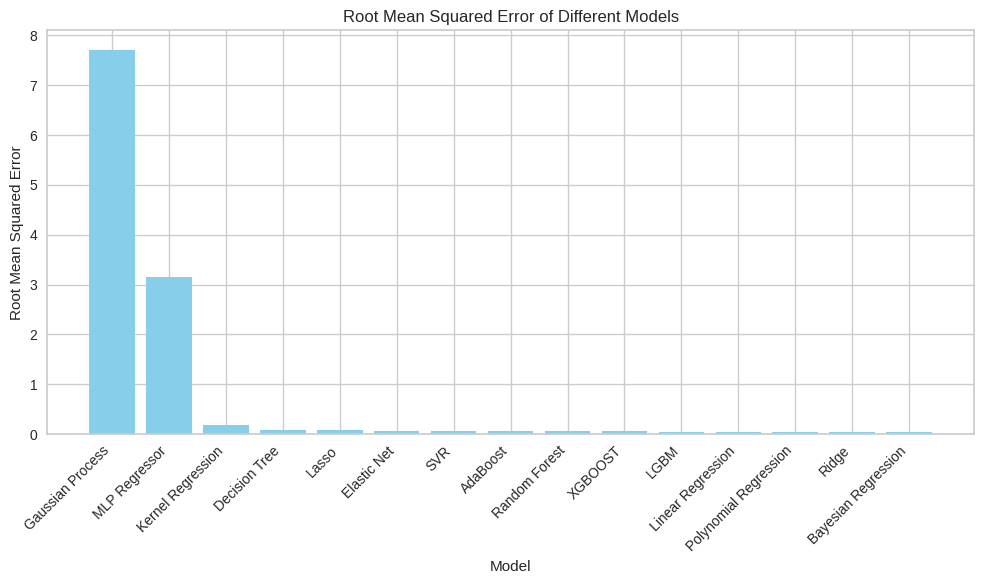

In [135]:
models_scores_sorted = models_scores.sort_values(by='Root Mean Squared Error', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models_scores_sorted['Model Name'], models_scores_sorted['Root Mean Squared Error'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Not Using CV Scores

In [143]:
# We use 60% X_Train and 40% X_test
# Initialize models
init_models = {
    'XGBOOST': XGBRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'AdaBoost': AdaBoostRegressor(),
    'Elastic Net': ElasticNet(),
    'SVR': SVR(),
    'Gaussian Process': GaussianProcessRegressor(),
    'MLP Regressor': MLPRegressor(),
    'Kernel Regression': KernelRidge(),
    'Bayesian Regression': BayesianRidge()
}

# Initialize lists to store scores
metrics = {
    'R2 Score': r2_score,
    'Mean Squared Error': mean_squared_error,
    'Root Mean Squared Error': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'Mean Absolute Error': mean_absolute_error
}

models_results = []

# Loop through the models
for key, model in init_models.items():
    if isinstance(model, PolynomialFeatures):
        # If the model is Polynomial Regression, transform the data
        X_poly_train = model.fit_transform(X_train)
        model = LinearRegression()  # Linear regression on polynomial features
        model.fit(X_poly_train, y_train)
    else:
        model.fit(X_train, y_train)
    model_results = {'Model Name': key}
    # Calculate evaluation metrics using the testing data
    for metric_name, metric_func in metrics.items():
        y_pred = model.predict(X_test)
        model_results[metric_name] = metric_func(y_test, y_pred)
    models_results.append(model_results)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2776
[LightGBM] [Info] Number of data points in the train set: 867, number of used features: 70
[LightGBM] [Info] Start training from score 7.727964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [146]:
models_scores = pd.DataFrame(models_results)
models_scores_sorted = models_scores.sort_values(by='R2 Score', ascending=False)
models_scores_sorted.head(len(init_models))


Model Name  R2 Score  Mean Squared Error  \
13  Bayesian Regression      0.90                0.00   
5                 Ridge      0.90                0.00   
4     Linear Regression      0.90                0.00   
3                  LGBM      0.90                0.00   
2         Random Forest      0.88                0.00   
..                  ...       ...                 ...   
6                 Lasso      0.75                0.01   
1         Decision Tree      0.69                0.01   
12    Kernel Regression     -0.23                0.03   
11        MLP Regressor   -453.50               10.67   
10     Gaussian Process  -2533.12               59.51   

    Root Mean Squared Error  Mean Absolute Error  
13                     0.05                 0.03  
5                      0.05                 0.03  
4                      0.05                 0.03  
3                      0.05                 0.03  
2                      0.05                 0.04  
..                      ...                  ...  
6                      0.08                 0.05  
1                      0.09                 0.06  
12                     0.17                 0.12  
11                     3.27                 2.40  
10                     7.71                 7.71  

[14 rows x 5 columns]

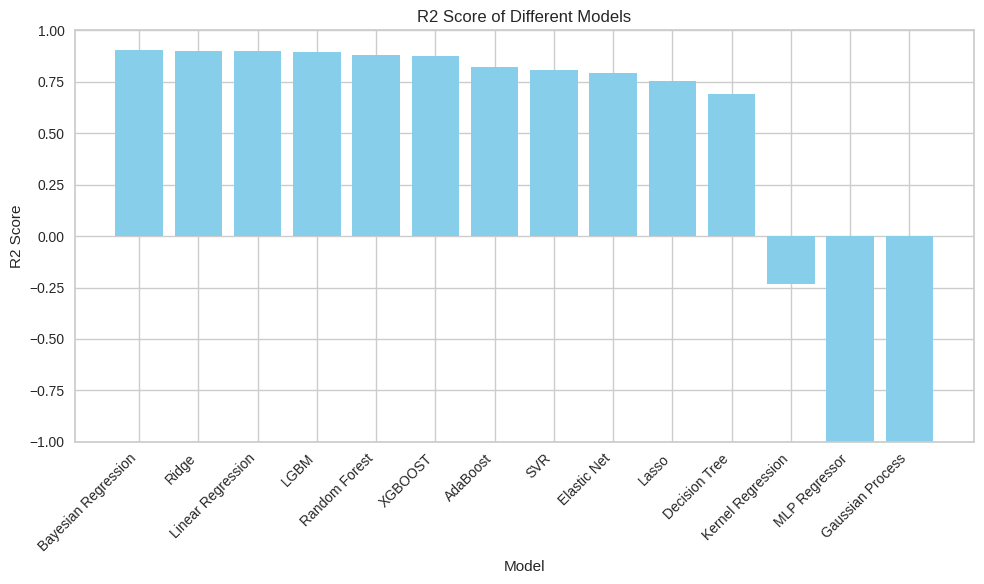

In [147]:
models_scores_sorted = models_scores.sort_values(by='R2 Score', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models_scores_sorted['Model Name'], models_scores_sorted['R2 Score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score of Different Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()


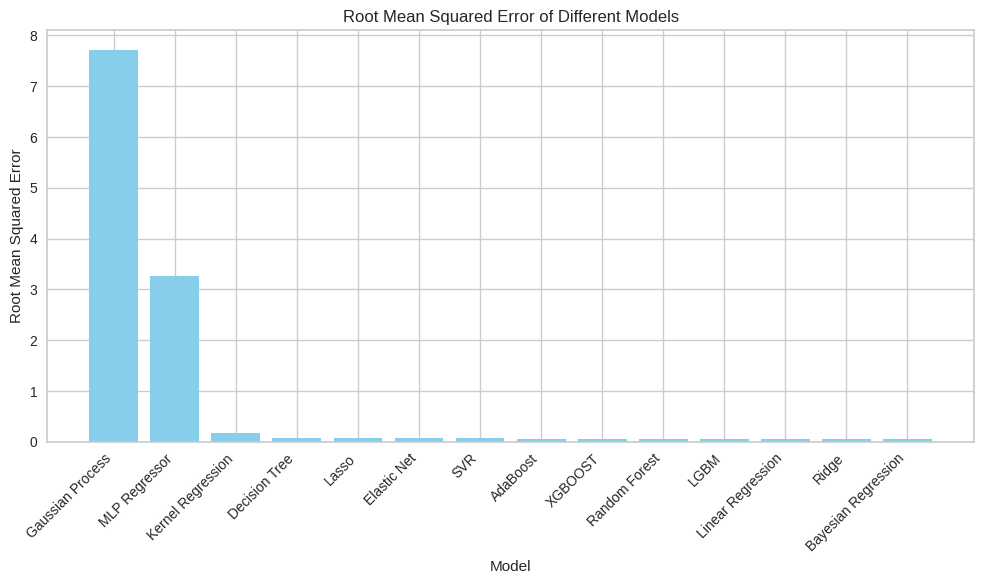

In [148]:
models_scores_sorted = models_scores.sort_values(by='Root Mean Squared Error', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models_scores_sorted['Model Name'], models_scores_sorted['Root Mean Squared Error'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Using PyCaret

In [150]:
from pycaret.regression import *


In [151]:
exp_reg101 = setup(data = train_2, target = 'SalePrice', session_id=123)


In [152]:
compare_models()


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

BayesianRidge()

# Kesimpulan


Ketiga metode menunjukkan bahwa bayessian Regression memiliki nilai RMSE dan R2 terbaik, sehingga model ini adalah model yang cukup baik. Performa model dapat ditingkatkan dengan melakukan feature engineering lebih lanjut serta melakukan feature selection